In [4]:
from PIL import Image,ImageEnhance,ImageOps,ImageFilter
import pandas as pd
import re
%pylab inline
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import cv2


Populating the interactive namespace from numpy and matplotlib


In [5]:
text_data=pd.read_csv('/home/samuel/Documents/DATA/P6/Dataset+projet+prétraitement+textes+images/Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [6]:
text_data.head(1)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   

        product_rating       overall_rating     brand  \
0  No rating available  No rating available  Elegance   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...

In [7]:
def find(x):
    c=re.findall(r'\["([A-Za-z &]*) >> ',x)
    return c[0]
find('["Home Furnishing >> Curtains & Accessories >>')

'Home Furnishing'

In [8]:
data=text_data[['uniq_id','image','product_category_tree']].copy()
data['categorie']=data['product_category_tree'].apply(lambda x:find(x))
data.drop('product_category_tree',axis=1,inplace=True)

In [9]:
data.describe()

uniq_id  \
count                               1050   
unique                              1050   
top     aa82b75da7579007963e53b6f818281b   
freq                                   1   

                                       image  categorie  
count                                   1050       1050  
unique                                  1050          7  
top     fc59187b2e011cf098ce420a0ee02e10.jpg  Baby Care  
freq                                       1        150

In [10]:
data.head()

uniq_id                                 image  \
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   

         categorie  
0  Home Furnishing  
1        Baby Care  
2        Baby Care  
3  Home Furnishing  
4  Home Furnishing

In [11]:
#On va mettre les image à la place d'image et on va directement les mettre au format VGG16

data['imagevgg16']=data['image'].apply(lambda x: img_to_array(load_img(x,target_size=(224,224))))

/home/samuel/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2832: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [12]:
data.head(2)

uniq_id                                 image  \
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   

         categorie                                         imagevgg16  
0  Home Furnishing  [[[206.0, 204.0, 192.0], [205.0, 203.0, 191.0]...  
1        Baby Care  [[[255.0, 255.0, 255.0], [255.0, 255.0, 255.0]...

In [13]:
#On va aussi prendr eles images d'origine

data['image_origine']=data['image'].apply(lambda x: np.array(Image.open(x)))

/home/samuel/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2832: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


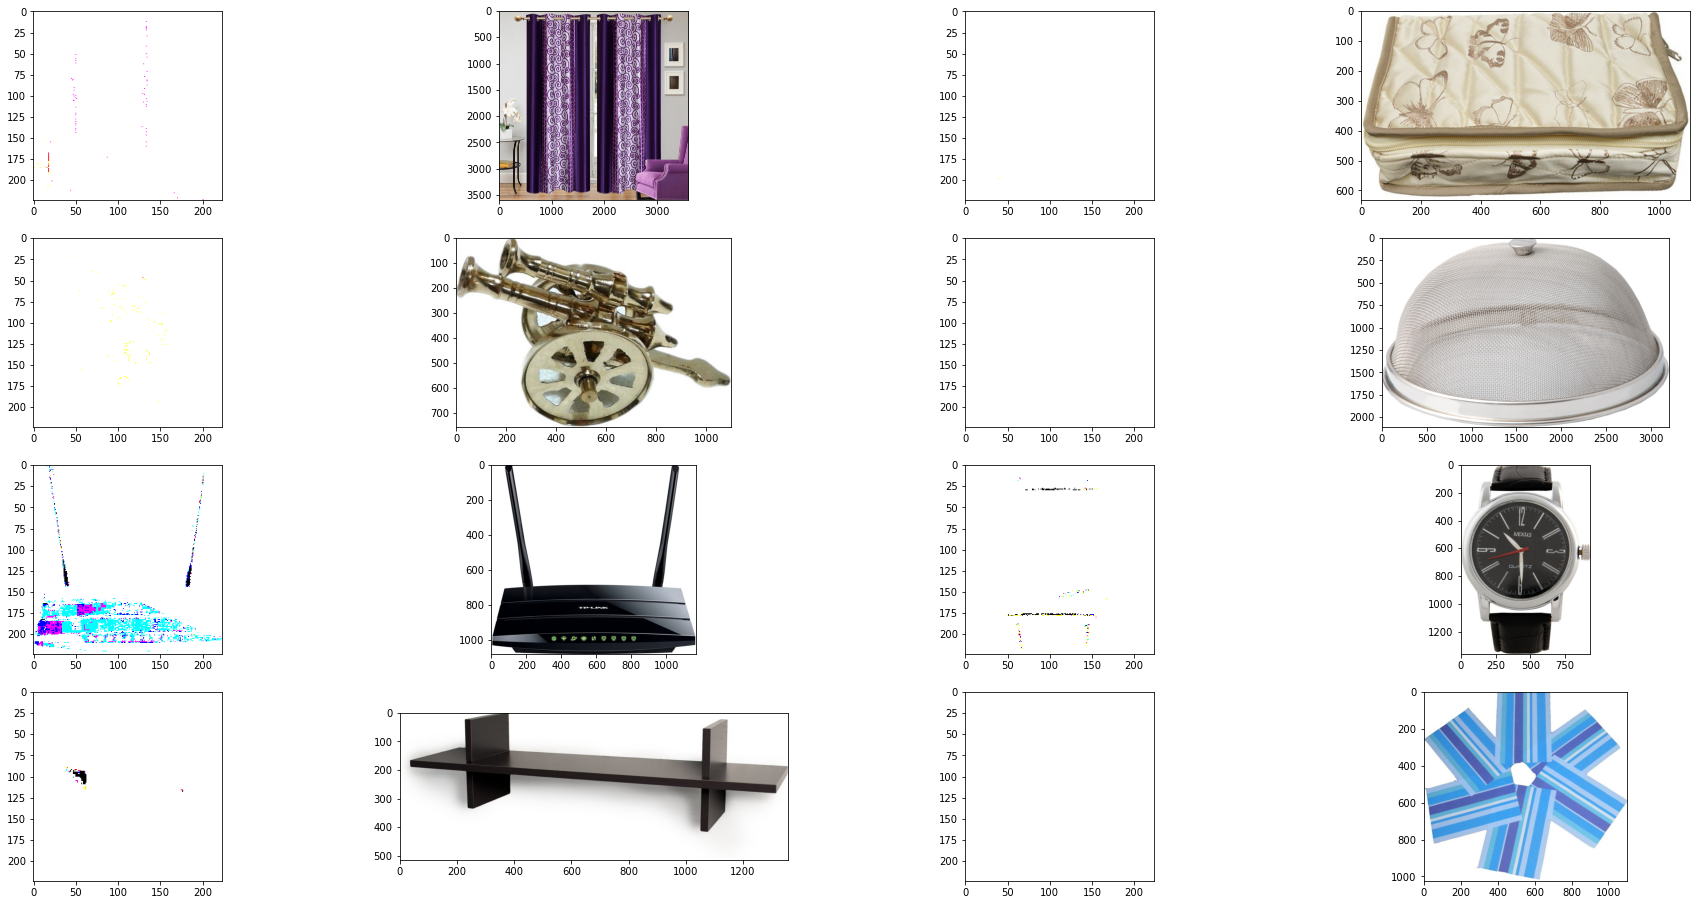

In [14]:
#regardons les photos VGG16 et les photos réelles:
fig=plt.figure(figsize=(32,16))

for i in range(8):
    plt.subplot(4,4,2*i+1)
    plt.imshow(data.iloc[100*i]['imagevgg16'])
    plt.subplot(4,4,2*i+2)
    plt.imshow(data.iloc[100*i]['image_origine'])

In [15]:
def reduc(x):
    img=Image.open(x)
    img.thumbnail((224,224))
    return img

In [16]:
#Bon du coup on va mettre les images au format 224,224,3
#On va commencer par travailler avec des images en noir et blanc voir ce que ça donne:
data['image_resh']=data['image'].apply(lambda x: np.array(reduc(x)))


In [17]:
data.head(1)

uniq_id                                 image  \
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

         categorie                                         imagevgg16  \
0  Home Furnishing  [[[206.0, 204.0, 192.0], [205.0, 203.0, 191.0]...   

                                       image_origine  \
0  [[[192, 184, 173], [192, 184, 173], [193, 185,...   

                                          image_resh  
0  [[[203, 198, 188], [203, 198, 188], [203, 197,...

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


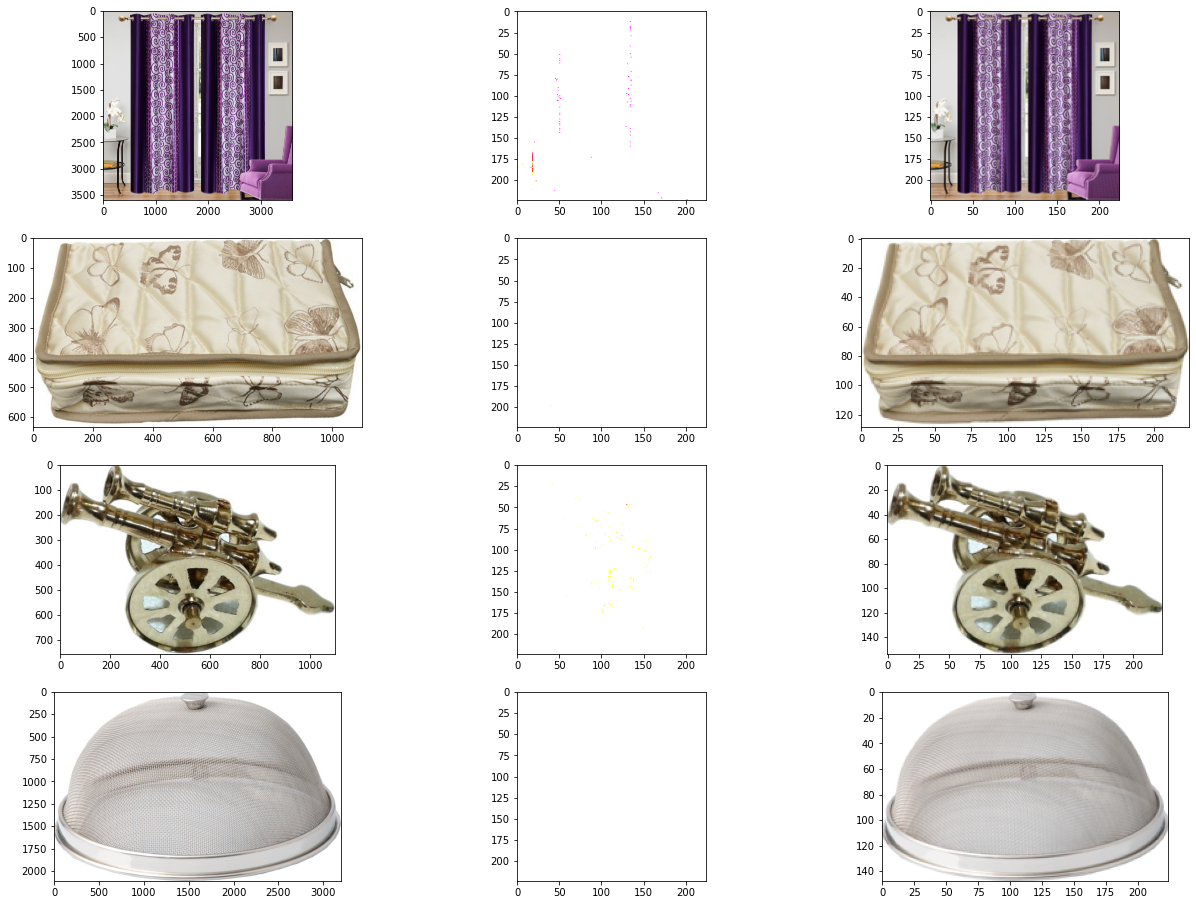

In [18]:
#regardons:
fig=plt.figure(figsize=(21,16))

for i in range(4):
    plt.subplot(4,3,3*i+1)
    plt.imshow(data.iloc[100*i]['image_origine'])
    plt.subplot(4,3,3*i+2)
    plt.imshow(data.iloc[100*i]['imagevgg16'])
    plt.subplot(4,3,3*i+3)
    plt.imshow(data.iloc[100*i]['image_resh'])
    

In [19]:
#Bon en noir et blanc:
data['image_nb']=data['image'].apply(lambda x: np.array(reduc(x).convert('L')))

/home/samuel/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2832: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [20]:
data.head(1)

uniq_id                                 image  \
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

         categorie                                         imagevgg16  \
0  Home Furnishing  [[[206.0, 204.0, 192.0], [205.0, 203.0, 191.0]...   

                                       image_origine  \
0  [[[192, 184, 173], [192, 184, 173], [193, 185,...   

                                          image_resh  \
0  [[[203, 198, 188], [203, 198, 188], [203, 197,...   

                                            image_nb  
0  [[198, 198, 198, 198, 198, 200, 200, 199, 199,...

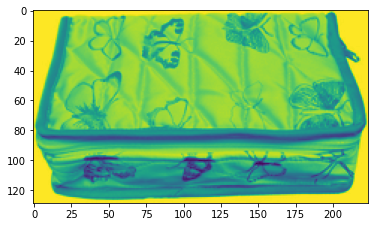

In [21]:
plt.imshow(data.iloc[100]['image_nb'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


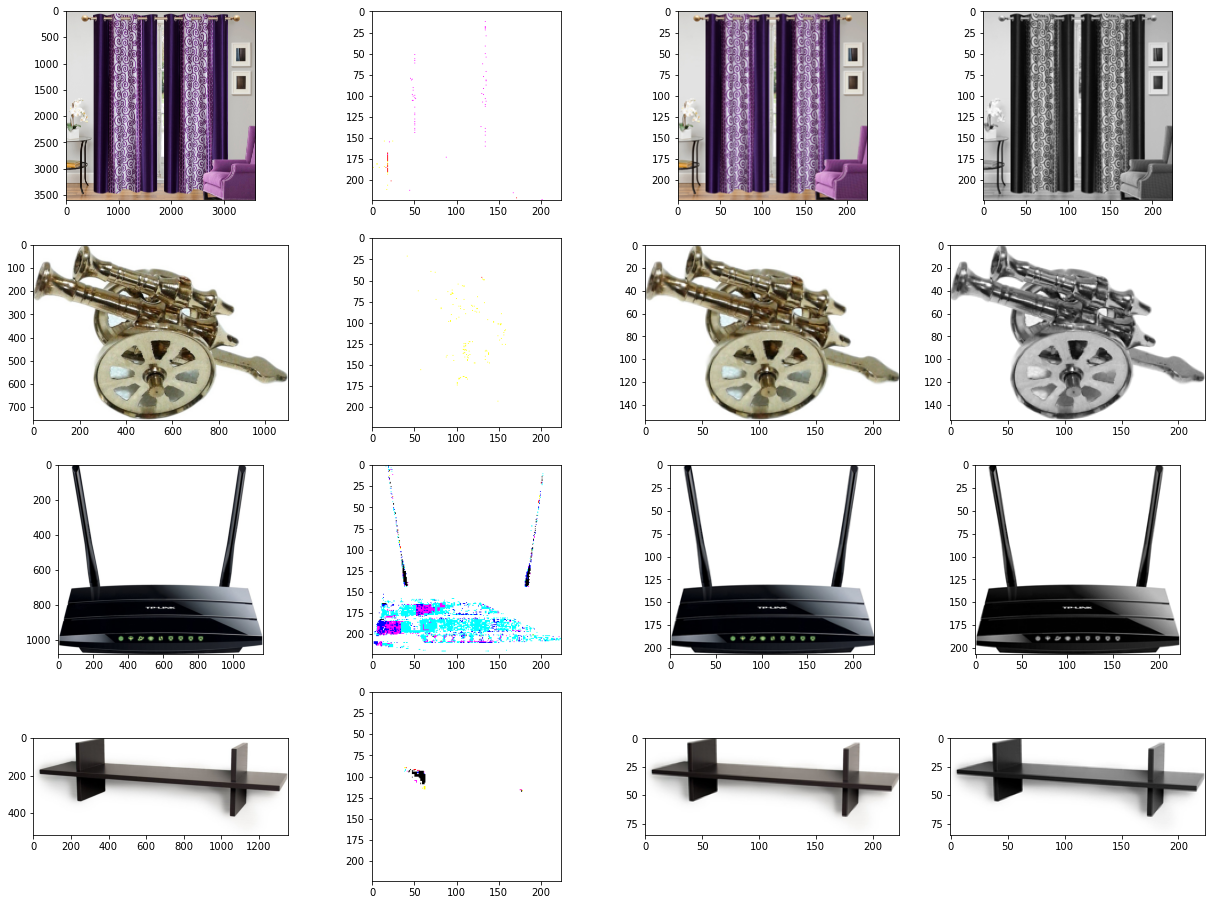

In [22]:
#regardons:
fig=plt.figure(figsize=(21,16))

for i in range(4):
    plt.subplot(4,4,4*i+1)
    plt.imshow(data.iloc[200*i]['image_origine'])
    plt.subplot(4,4,4*i+2)
    plt.imshow(data.iloc[200*i]['imagevgg16'])
    plt.subplot(4,4,4*i+3)
    plt.imshow(data.iloc[200*i]['image_resh'])
    plt.subplot(4,4,4*i+4)
    plt.imshow(data.iloc[200*i]['image_nb'],cmap='gray', vmin=0, vmax=255)

# On essai avec les image reshappées

In [86]:
data.head(1)

uniq_id                                 image  \
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

         categorie                                         imagevgg16  \
0  Home Furnishing  [[[206, 204, 192], [205, 203, 191], [205, 202,...   

                                       image_origine  \
0  [[[192, 184, 173], [192, 184, 173], [193, 185,...   

                                          image_resh  \
0  [[[203, 198, 188], [203, 198, 188], [203, 197,...   

                                            image_nb  
0  [[198, 198, 198, 198, 198, 200, 200, 199, 199,...

In [141]:
test=data.iloc[400]['image_nb']

In [142]:
#On va partir la dessus on fait un test:
sf =data.iloc[400]['image_nb']
img=data.iloc[400]['image_nb']

sift=cv2.SIFT_create()
(kps, descs) = sift.detectAndCompute(sf, None)


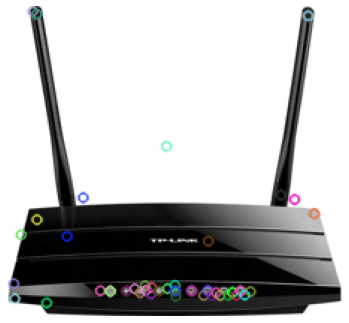

In [143]:
img2 = cv2.drawKeypoints(img, kps[:100], outImage=None) 
plt.figure(figsize = (6,6))
plt.imshow(img2)
plt.axis('off')
plt.show()

In [144]:
def extracteur_desc_Sift(image):
    sift=cv2.SIFT_create()
    (kps, desc) = sift.detectAndCompute(image, None)
    return desc

In [148]:
#On va mettre nos descripterus dans le table
data["siftNB"]=data["image_nb"].apply(extracteur_desc_Sift)

In [151]:
data["siftNB"].apply(lambda x:size(x)).describe()

count      1050.000000
mean      26099.200952
std       22239.946891
min           1.000000
25%       10752.000000
50%       20864.000000
75%       35040.000000
max      300544.000000
Name: siftNB, dtype: float64

In [157]:
#On crée un tableau de descripteurs:
descr=data.loc[0,"siftNB"]
for i in range(1,data.shape[0]):
    if size(data.loc[i,"siftNB"])>1:
        descr=np.vstack([descr,data.loc[i,"siftNB"]])

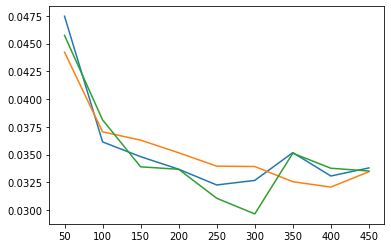

In [158]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#on va voir comment clusteriser ces descripteurs:
for i in range(3):
    #Je prends un échantillon d'environ 10% du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,30000)
    sil=[]
    for i in range(50,500,50):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,500,50),sil)
plt.show()  
    

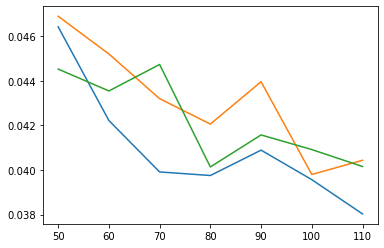

In [159]:
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,20000)
    sil=[]
    for i in range(50,120,10):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,120,10),sil)
plt.show()  

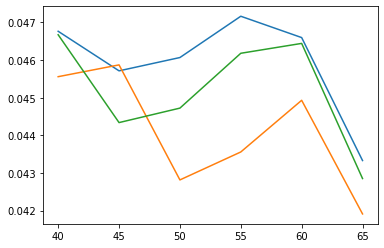

In [161]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,20000)
    sil=[]
    for i in range(40,70,5):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(40,70,5),sil)
plt.show()  

30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58


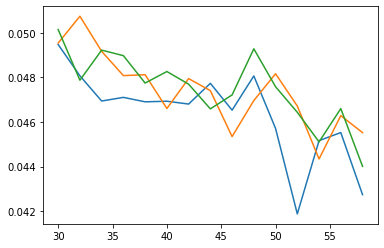

In [164]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,20000)
    sil=[]
    for i in range(30,60,2):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))
        print(i)
    plt.plot(range(30,60,2),sil)
plt.show() 

In [165]:
#On va partir sur 48 clusters
#regardons ce que ça donne:
km=KMeans(n_clusters=48)
km.fit(descr)
y=km.predict(descr)
print(silhouette_score(descr,y))

0.044868376


In [166]:
#On a donc notre cluster
#on va construire un df avec 64 features et pour chaque image on indiquera combien de descripteurs de chaque
#cluster elle contient:

df=data[['categorie',"siftNB"]].copy()
df.head()


categorie                                             siftNB
0  Home Furnishing  [[0.0, 1.0, 56.0, 45.0, 0.0, 0.0, 0.0, 0.0, 8....
1        Baby Care  [[0.0, 0.0, 0.0, 0.0, 25.0, 130.0, 2.0, 0.0, 8...
2        Baby Care  [[13.0, 129.0, 78.0, 5.0, 5.0, 4.0, 2.0, 11.0,...
3  Home Furnishing  [[48.0, 102.0, 45.0, 19.0, 5.0, 1.0, 0.0, 1.0,...
4  Home Furnishing  [[6.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 114....

In [167]:
for i in range(48):
    df[i]=np.zeros(df.shape[0])

 

In [168]:
km.predict(df.iloc[0]['siftNB'])

array([42, 42, 16, 21, 43,  8, 16, 25, 40,  1,  1, 36, 45, 25,  0,  8,  6,
       37, 45,  7, 37, 32, 34,  8, 15, 15, 15, 15, 37, 15, 25,  4,  4, 34,
        6, 27, 18,  1, 16,  8, 27, 43, 47, 47, 42, 43, 43, 47, 10, 10, 20,
       17, 27, 10, 10, 28,  8, 30, 15, 47,  2, 43, 39, 33, 47, 47, 33, 47,
       47, 39, 39, 46, 39, 39, 47, 47, 39, 47, 39, 46, 39, 39, 39, 39, 39,
       10, 35, 35, 35, 35, 31, 35, 31, 35, 35, 35, 35, 31, 31, 35, 35, 35,
       35, 31, 36, 29, 39, 29, 39, 39,  7,  7, 23,  7,  7,  7,  1, 34, 35,
       23,  7, 47,  2, 18, 18, 18, 25, 30, 31, 31, 15, 30, 31, 30, 15, 30,
       15, 31, 31, 31, 41, 31, 31, 38, 31, 31, 35, 29, 39, 20, 38, 29, 39,
       45, 45, 42,  7,  6, 23, 29, 39,  6, 27, 23, 11, 23,  7, 23,  7, 23,
       35, 43, 35, 23, 35, 43, 35, 35, 44, 37, 35,  3,  4,  0, 23, 31, 23,
       35, 15, 15, 11, 35, 35, 31, 31, 25, 35, 35,  2, 35, 39, 39, 23, 23,
       23, 39, 23, 39, 39, 23, 23, 39, 23, 39, 39, 39, 27, 35, 23, 23, 23,
       46, 43, 23, 30, 22

In [169]:
def features(row,k):
    n=0
    if size(row['siftNB'])==1:
        return 0
    for i in km.predict(row['siftNB']):
        if i==k:
            n+=1
    return n

In [170]:
for i in range(48):
    df[i]=df.apply(lambda x: features(x,i),axis=1)

In [171]:
df

categorie                                             siftNB  0  \
0     Home Furnishing  [[0.0, 1.0, 56.0, 45.0, 0.0, 0.0, 0.0, 0.0, 8....  5   
1           Baby Care  [[0.0, 0.0, 0.0, 0.0, 25.0, 130.0, 2.0, 0.0, 8...  4   
2           Baby Care  [[13.0, 129.0, 78.0, 5.0, 5.0, 4.0, 2.0, 11.0,...  4   
3     Home Furnishing  [[48.0, 102.0, 45.0, 19.0, 5.0, 1.0, 0.0, 1.0,...  5   
4     Home Furnishing  [[6.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 114....  3   
...               ...                                                ... ..   
1045        Baby Care  [[71.0, 81.0, 41.0, 0.0, 0.0, 0.0, 0.0, 16.0, ...  4   
1046        Baby Care  [[10.0, 1.0, 2.0, 21.0, 60.0, 27.0, 16.0, 24.0...  3   
1047        Baby Care  [[7.0, 9.0, 0.0, 0.0, 1.0, 11.0, 7.0, 1.0, 81....  2   
1048        Baby Care  [[118.0, 49.0, 32.0, 22.0, 0.0, 0.0, 0.0, 0.0,...  3   
1049        Baby Care  [[0.0, 107.0, 56.0, 7.0, 18.0, 1.0, 0.0, 0.0, ...  2   

       1   2   3   4   5   6   7  ...  38  39  40  41  42  43  44  45  46  47  
0      9   5   5   3   4   6  21  ...   6  54   1   3   8  12   5   6  11  31  
1      2   0   0   0   2   1   2  ...   1   1   0   0   0   1   0   0   2   7  
2      7  25   0  15   3  25  19  ...   0  63   0  22   6   1   0   3   7  12  
3      0   5  26  53   3   4   7  ...  17   3   1   3   0   0   5   4   3   9  
4     21   2   7   1   2   4   9  ...  10   1  20   5   9   1   4   5   5  11  
...   ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
1045   8   9   3   0  12   5   2  ...   1   0  34   2   3  11   0   8  10   9  
1046   5   0   1   0   9   0   0  ...   2   1   3   4   7   8   1  10   3   6  
1047  16   5  17   0  13  11   3  ...   5   2  24   5   6   6   5   4   6   6  
1048   0   1   0   1   3   0   0  ...   2   2   0   0   7   1   3   5   2   6  
1049  16   3  19   1  21   0   1  ...   1   1  26   2  14  14   2   9  11   1  

[1050 rows x 50 columns]

In [172]:
X=df.drop(['categorie','siftNB'],axis=1).values

<ipython-input-173-04f1b3d29dca>:21: UserWarning: Legend does not support 0.07370323572932978 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-173-04f1b3d29dca>:24: UserWarning: Legend does not support 0.07370323572932978 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-173-04f1b3d29dca>:21: UserWarning: Legend does not support 0.17567621303245318 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-i

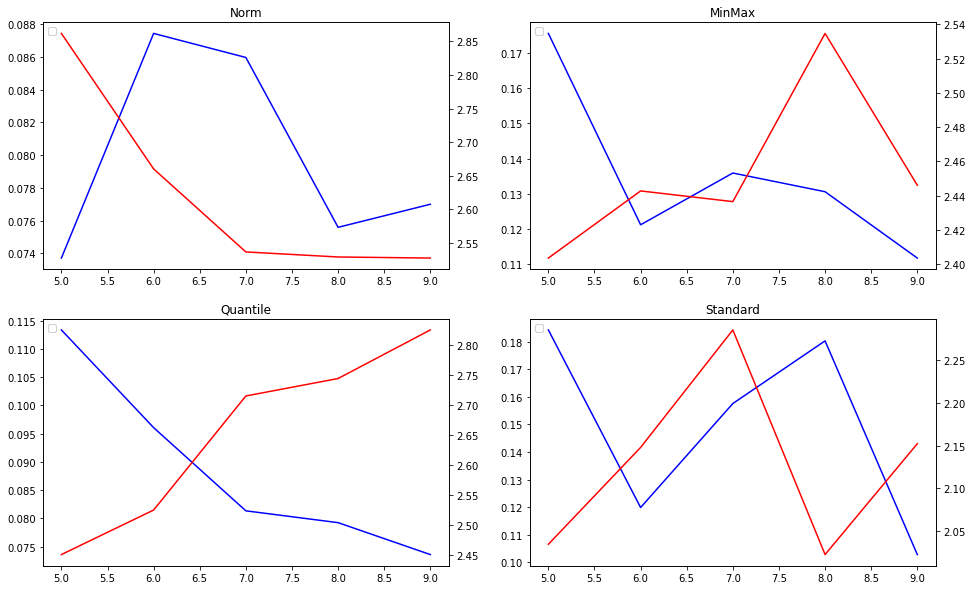

In [173]:
#On standardise et on regarde ce que ça donne:

from sklearn.preprocessing import Normalizer,MinMaxScaler,QuantileTransformer,StandardScaler
from sklearn.metrics import davies_bouldin_score

Trans=[Normalizer(),MinMaxScaler(),QuantileTransformer(),StandardScaler()]
Name=['Norm','MinMax','Quantile','Standard']
fig=figure(figsize=(16,10))
for i in range (4):
    sil=[]
    DB=[]
    X_trans=Trans[i].fit_transform(X)
    for n in range (5,10):
        kmean=KMeans(n_clusters=n)
        kmean.fit(X_trans)
        y=kmean.predict(X_trans)
        sil.append(silhouette_score(X_trans,y))
        DB.append(davies_bouldin_score(X_trans,y))
    plt.subplot(2,2,i+1)
    plt.plot(range(5,10),sil,c='b')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    ax2 = pyplot.gca().twinx()
    plt.plot(range(5,10),DB,c='r')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    plt.title(Name[i])
plt.show()

In [174]:
def cat(x):
    if x=='Home Furnishing':
        return 1
    if x=='Kitchen & Dining':
        return 2
    if x=='Computers':
        return 3
    if x=='Beauty and Personal Care':
        return 4
    if x=='Watches':
        return 5
    if x=='Baby Care':
        return 6
    else:
        return 0

In [175]:
df['cluster']=df['categorie'].apply(lambda x : cat(x))

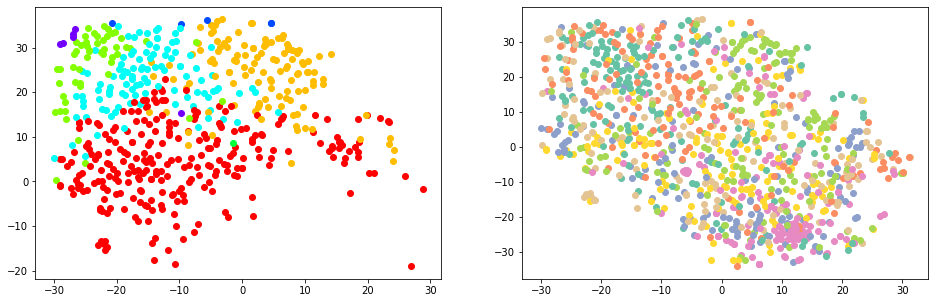

In [181]:
from sklearn.manifold import TSNE
#On regarde ce que ça donne avec 8 clusters:
#Avec un Standard Scaler
tsne=TSNE(n_components=2)
X_std=StandardScaler().fit_transform(X)
X_trans=tsne.fit_transform(X_std)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=8)
kmean.fit(X_std)
y=kmean.predict(X_std)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/8))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [182]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y,df['cluster'])

0.03929446618407081

In [178]:
#C'est un peu mieux mais c'est pas famuex...

In [183]:
from sklearn.decomposition import PCA,KernelPCA

In [185]:
pca=PCA(n_components=48)
pca.fit(X_std)


PCA(n_components=48)

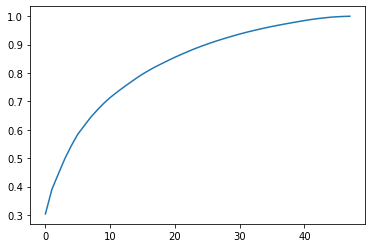

In [187]:
plt.plot(range(48),pca.explained_variance_ratio_.cumsum())
plt.show()

In [188]:
#On va tenter une réduction de dimension à 20 variables:
pca=PCA(n_components=10)

In [189]:
pca.fit(X_std)

PCA(n_components=10)

In [190]:
X_proj=pca.transform(X_std)

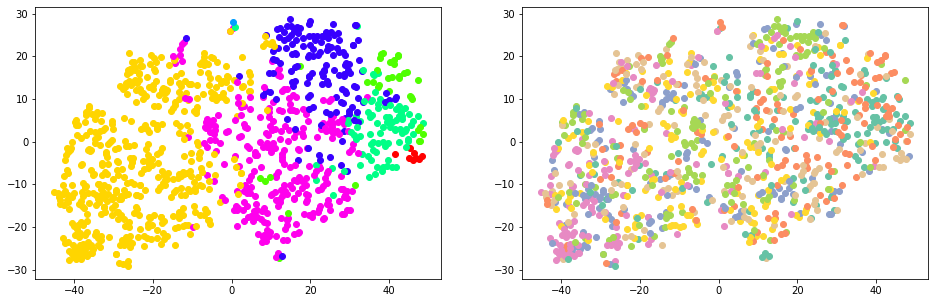

In [191]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_proj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=7)
kmean.fit(X_proj)
y=kmean.predict(X_proj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [192]:
adjusted_rand_score(y,df['cluster'])

0.039691910752725365

In [193]:
kpca=KernelPCA(kernel='rbf')
kpca.fit(X_std)


KernelPCA(kernel='rbf')

In [194]:
X_kproj=kpca.transform(X_std)

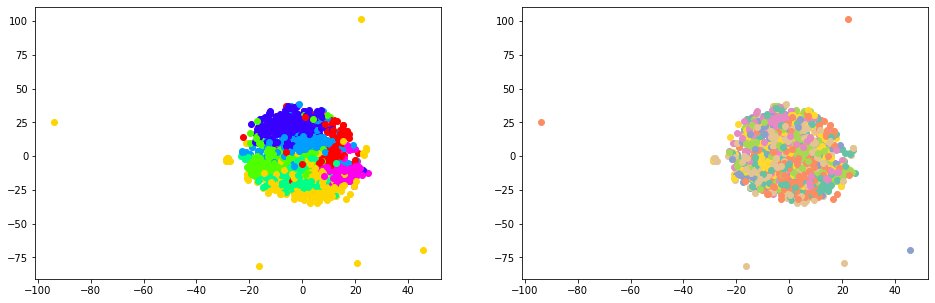

In [195]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_kproj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=7)
kmean.fit(X_kproj)
y=kmean.predict(X_kproj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [196]:
adjusted_rand_score(y,df['cluster'])

0.06847845124398287

In [ ]:
#On a encore un peu amélioré

In [ ]:
#Maintenant on va essayer de se rapprocher des images vgg16 avant d'extraire les features

In [23]:
def cont_eq(x):
    x=x.filter(ImageFilter.BoxBlur(2)) #On floute
    contrast = ImageEnhance.Contrast(x) 
    im=contrast.enhance(0.01) #On baisse fortement le contraste
    num=np.array(ImageOps.equalize(im))#On normalise    
    num+=(255-num.max()) #On blanchit le tout
    contrast2=ImageEnhance.Contrast(Image.fromarray(num)) 
    img=contrast2.enhance(5)#On rerenforce le contraste pour revenir à celui initial
    return np.array(ImageOps.equalize(img))

In [24]:
#Bon en noir et blanc:
data['image_nbcont']=data['image_nb'].apply(lambda x: cont_eq(Image.fromarray(x)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


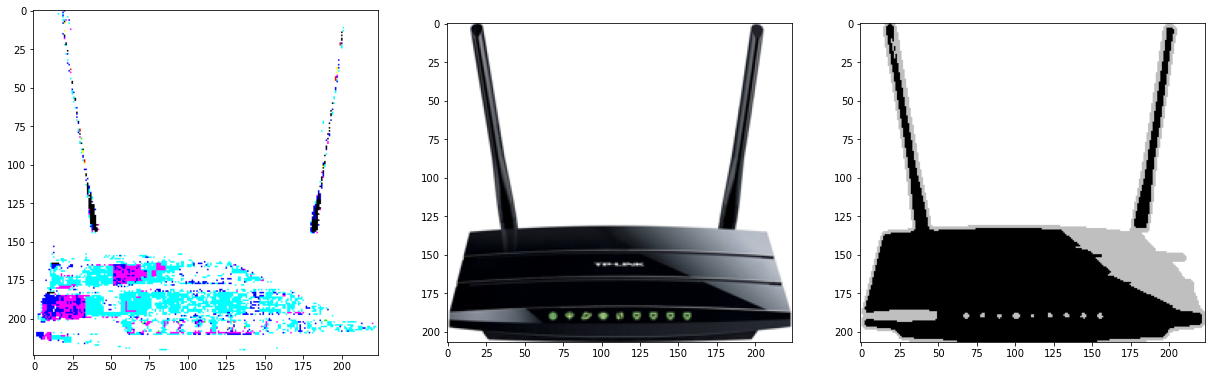

In [25]:
#regardons:
fig=plt.figure(figsize=(21,16))

plt.subplot(131)
plt.imshow(data.iloc[400]['imagevgg16'])
plt.subplot(132)
plt.imshow(data.iloc[400]['image_resh'])
plt.subplot(133)
plt.imshow(data.iloc[400]['image_nbcont'],cmap='gray', vmin=0, vmax=255)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


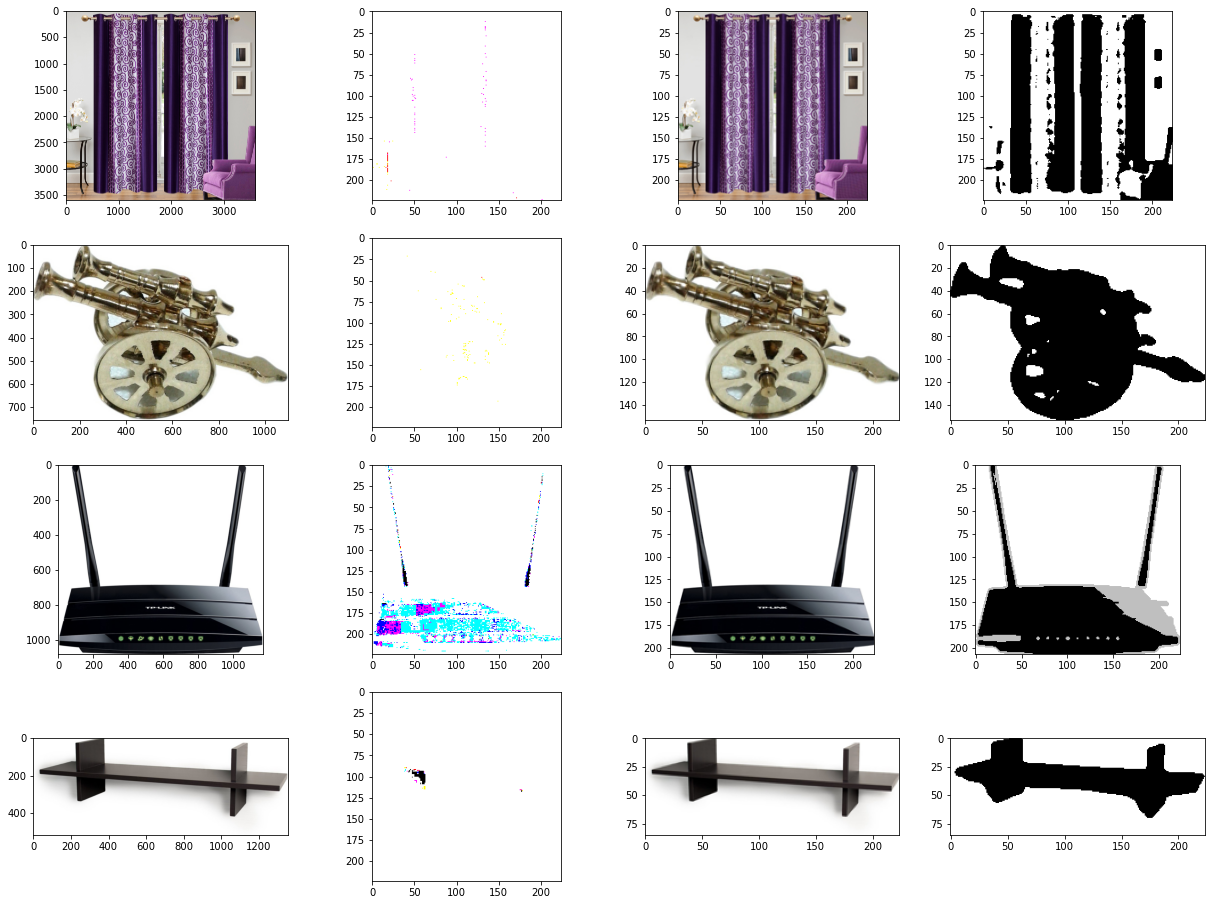

In [26]:
#regardons les autres images:
#regardons:
fig=plt.figure(figsize=(21,16))

for i in range(4):
    plt.subplot(4,4,4*i+1)
    plt.imshow(data.iloc[200*i]['image_origine'])
    plt.subplot(4,4,4*i+2)
    plt.imshow(data.iloc[200*i]['imagevgg16'])
    plt.subplot(4,4,4*i+3)
    plt.imshow(data.iloc[200*i]['image_resh'])
    plt.subplot(4,4,4*i+4)
    plt.imshow(data.iloc[200*i]['image_nbcont'],cmap='gray', vmin=0, vmax=255)

In [27]:
#On va voir ce que ca nous donne avec ça...

In [31]:
test=data.iloc[400]['image_nbcont']

In [32]:
a=test+(255-test.max())

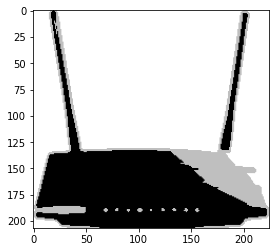

In [33]:
plt.imshow(a,cmap='gray', vmin=0, vmax=255)

In [34]:
#On va partir la dessus on fait un test:
sf =data.iloc[400]['image_nbcont']
img=data.iloc[400]['image_resh']

sift=cv2.SIFT_create()
(kps, descs) = sift.detectAndCompute(sf, None)


In [35]:
descs

array([[122.,  84.,   0., ...,   0.,   0.,   0.],
       [  0.,   4., 141., ...,   0.,   0.,   5.],
       [ 45.,   6.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 13.,  23.,   0., ...,   0.,   0.,   0.],
       [  4.,   1.,   0., ...,   0.,   0.,   1.],
       [ 64.,  41.,   0., ...,   0.,   0.,   1.]], dtype=float32)

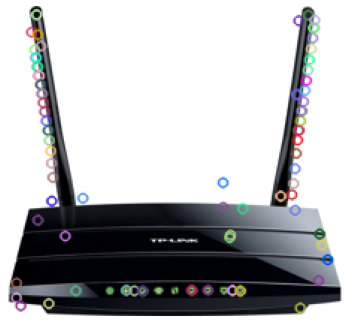

In [36]:
img2 = cv2.drawKeypoints(img, kps[:100], outImage=None) 
plt.figure(figsize = (6,6))
plt.imshow(img2)
plt.axis('off')
plt.show()

In [37]:
def extracteur_desc_Sift(image):
    sift=cv2.SIFT_create()
    (kps, desc) = sift.detectAndCompute(image, None)
    return desc

In [38]:
#On va mettre nos descripterus dans le table
data["descripteurs SIFT"]=data["image_nbcont"].apply(extracteur_desc_Sift)

In [39]:
data["descripteurs SIFT"].apply(lambda x:size(x)).describe()

count      1050.000000
mean      14006.613333
std       11623.301343
min         512.000000
25%        6272.000000
50%       11008.000000
75%       18432.000000
max      101504.000000
Name: descripteurs SIFT, dtype: float64

In [40]:
#On crée un tableau de descripteurs:
descr=data.loc[0,"descripteurs SIFT"]
for i in range(1,data.shape[0]):
    descr=np.vstack([descr,data.loc[i,"descripteurs SIFT"]])

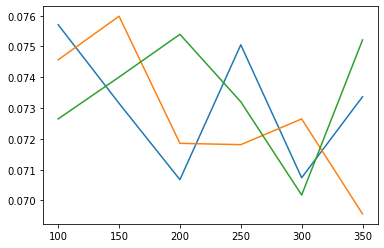

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#on va voir comment clusteriser ces descripteurs:
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,20000)
    sil=[]
    for i in range(100,400,50):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(100,400,50),sil)
plt.show()  
    

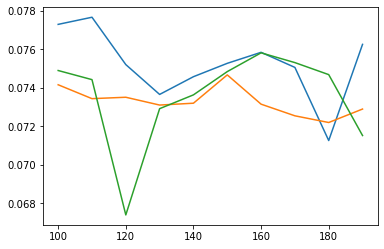

In [42]:
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,20000)
    sil=[]
    for i in range(100,200,10):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(100,200,10),sil)
plt.show()  

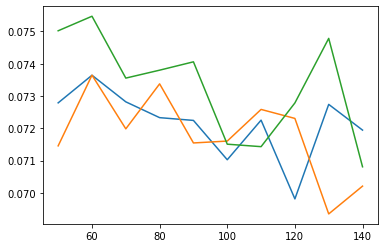

In [43]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,20000)
    sil=[]
    for i in range(50,150,10):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,150,10),sil)
plt.show()  

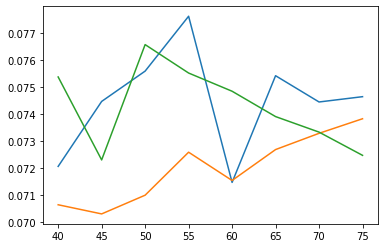

In [44]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,20000)
    sil=[]
    for i in range(40,80,5):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(40,80,5),sil)
plt.show() 

In [45]:
#On va partir sur 60 clusters
#regardons ce que ça donne:
km=KMeans(n_clusters=60)
km.fit(descr)
y=km.predict(descr)
print(silhouette_score(descr,y))

0.07223475


In [46]:
#On a donc notre cluster
#on va construire un df avec 60 features et pour chaque image on indiquera combien de descripteurs de chaque
#cluster elle contient:

df=data[['categorie',"descripteurs SIFT"]].copy()
df.head()


categorie                                  descripteurs SIFT
0  Home Furnishing  [[0.0, 0.0, 0.0, 0.0, 61.0, 51.0, 29.0, 0.0, 7...
1        Baby Care  [[0.0, 3.0, 1.0, 0.0, 0.0, 47.0, 11.0, 0.0, 34...
2        Baby Care  [[0.0, 0.0, 54.0, 22.0, 0.0, 0.0, 0.0, 0.0, 81...
3  Home Furnishing  [[4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 73.0, 47.0, 70...
4  Home Furnishing  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 174....

In [47]:
for i in range(60):
    df[i]=np.zeros(df.shape[0])

 

In [48]:
km.predict(df.iloc[0]['descripteurs SIFT'])

array([50, 17, 17, 56, 56,  6, 17, 31, 51, 15, 51, 50, 38, 34, 54, 46, 54,
       54, 54,  3, 52,  1,  1, 49,  4, 32, 50, 54,  1,  4, 32,  4, 19, 45,
       45, 45, 45, 45, 45, 20, 25, 46, 52, 46, 46, 52, 52, 46, 18, 11, 19,
       26, 31, 15, 53, 34, 34, 49, 50, 36, 15,  6, 15, 49, 24, 26, 26, 45,
       26, 45, 41, 49, 48, 26,  9,  9, 26, 21, 24, 41,  9, 49, 20, 20, 38,
       45, 31, 14, 19,  4, 50, 42, 52, 52,  1, 19,  4,  1, 49, 45, 45, 45,
       45, 45, 27, 47, 22, 14, 34, 46, 52, 46, 52, 46, 52, 26, 26,  5,  0,
       17, 44, 34, 50, 51, 15,  0, 15, 15, 20, 44, 43, 56, 15, 49, 26, 26,
       20, 26,  9, 11, 19, 45, 41, 49, 25, 48, 26,  9, 41,  9, 38, 36, 21,
       29,  3, 26, 12, 49, 27, 20, 29,  7, 36, 59, 38, 34, 51, 20, 23, 35,
       28, 41, 40, 23,  1, 45, 48,  9, 52,  2, 16, 46,  4, 32, 15, 15, 47,
       35, 48], dtype=int32)

In [49]:
def features(row,k):
    n=0
    for i in km.predict(row['descripteurs SIFT']):
        if i==k:
            n+=1
    return n

In [50]:
for i in range(60):
    df[i]=df.apply(lambda x: features(x,i),axis=1)

In [51]:
df

categorie                                  descripteurs SIFT  0  \
0     Home Furnishing  [[0.0, 0.0, 0.0, 0.0, 61.0, 51.0, 29.0, 0.0, 7...  2   
1           Baby Care  [[0.0, 3.0, 1.0, 0.0, 0.0, 47.0, 11.0, 0.0, 34...  0   
2           Baby Care  [[0.0, 0.0, 54.0, 22.0, 0.0, 0.0, 0.0, 0.0, 81...  2   
3     Home Furnishing  [[4.0, 0.0, 0.0, 0.0, 0.0, 3.0, 73.0, 47.0, 70...  0   
4     Home Furnishing  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 174....  6   
...               ...                                                ... ..   
1045        Baby Care  [[0.0, 0.0, 4.0, 117.0, 12.0, 0.0, 0.0, 0.0, 5...  4   
1046        Baby Care  [[0.0, 0.0, 0.0, 11.0, 65.0, 1.0, 0.0, 0.0, 8....  1   
1047        Baby Care  [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 90.0...  9   
1048        Baby Care  [[62.0, 19.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18...  0   
1049        Baby Care  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 31.0...  3   

      1   2   3  4  5   6   7  ...  50  51  52  53  54  55  56  57  58  59  
0     6   1   2  6  1   2   1  ...   6   4  10   1   5   0   3   0   0   1  
1     1   0   0  0  1   0   0  ...   0   2   0   3   0   0   0   0   3   1  
2     6   1   1  3  0   3   2  ...   2   1  10   1   3   0   0   2   3   0  
3     5   2   4  1  1   3   8  ...   0   0   4   4   0   4   2   2   3   4  
4     2   4   4  8  4   2   0  ...   1   0   5   8   6   3  10   4  11   3  
...  ..  ..  .. .. ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
1045  0   5   3  3  3   4   0  ...   9   6   2   9   7   2  29   3   3   0  
1046  0   1   0  0  6   0   1  ...   1   2   0   4   1   4   1   1   5   0  
1047  1  15   9  1  1   4   3  ...   6   1   0   3   2   7  13   3   4   3  
1048  1   0   0  0  0   1   0  ...   0   0   0   1   0   3   0   1   3   3  
1049  0   7  17  3  7  17  14  ...   2   1   1   3   2  13  11  12   8  11  

[1050 rows x 62 columns]

In [52]:
X=df.drop(['categorie','descripteurs SIFT'],axis=1).values

<ipython-input-53-04f1b3d29dca>:21: UserWarning: Legend does not support 0.08615511923522376 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-53-04f1b3d29dca>:24: UserWarning: Legend does not support 0.08615511923522376 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-53-04f1b3d29dca>:21: UserWarning: Legend does not support 0.07597470947404467 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-inpu

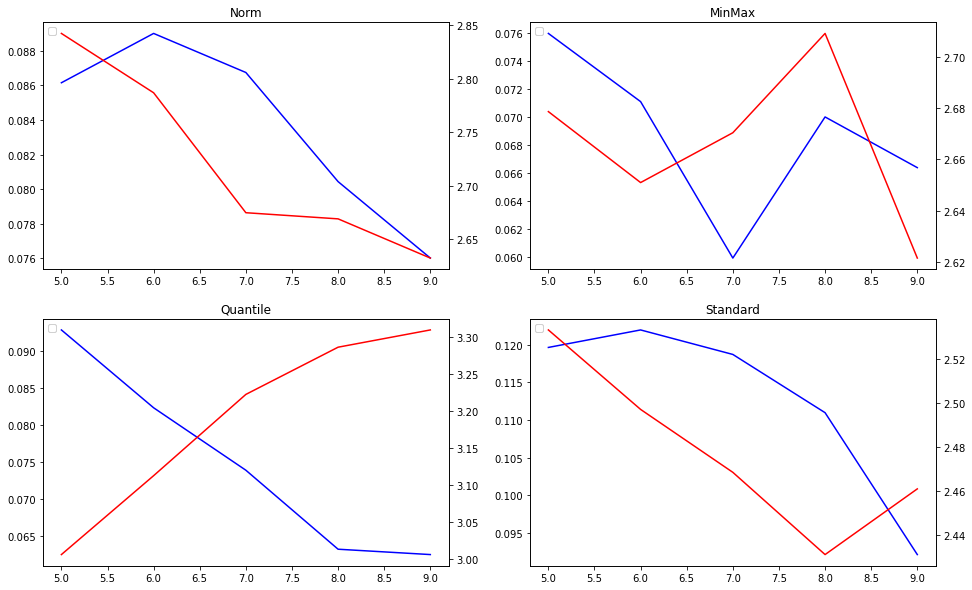

In [53]:
#On standardise et on regarde ce que ça donne:

from sklearn.preprocessing import Normalizer,MinMaxScaler,QuantileTransformer,StandardScaler
from sklearn.metrics import davies_bouldin_score

Trans=[Normalizer(),MinMaxScaler(),QuantileTransformer(),StandardScaler()]
Name=['Norm','MinMax','Quantile','Standard']
fig=figure(figsize=(16,10))
for i in range (4):
    sil=[]
    DB=[]
    X_trans=Trans[i].fit_transform(X)
    for n in range (5,10):
        kmean=KMeans(n_clusters=n)
        kmean.fit(X_trans)
        y=kmean.predict(X_trans)
        sil.append(silhouette_score(X_trans,y))
        DB.append(davies_bouldin_score(X_trans,y))
    plt.subplot(2,2,i+1)
    plt.plot(range(5,10),sil,c='b')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    ax2 = pyplot.gca().twinx()
    plt.plot(range(5,10),DB,c='r')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    plt.title(Name[i])
plt.show()

In [54]:
def cat(x):
    if x=='Home Furnishing':
        return 1
    if x=='Kitchen & Dining':
        return 2
    if x=='Computers':
        return 3
    if x=='Beauty and Personal Care':
        return 4
    if x=='Watches':
        return 5
    if x=='Baby Care':
        return 6
    else:
        return 0

In [55]:
df['cluster']=df['categorie'].apply(lambda x : cat(x))

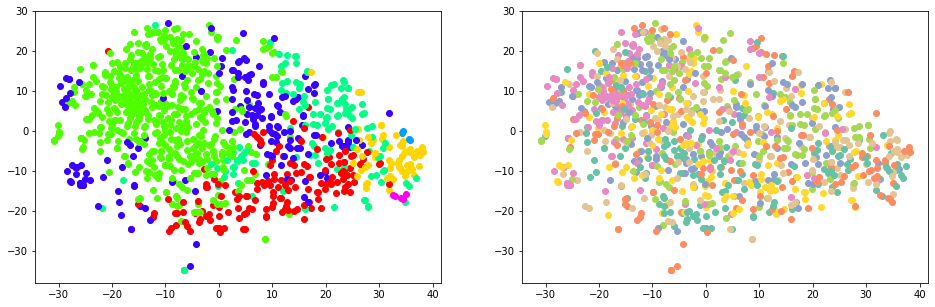

In [56]:
from sklearn.manifold import TSNE
#On regarde ce que ça donne avec les 7 clusters:
#Avec un Standard Scaler
tsne=TSNE(n_components=2)
X_std=StandardScaler().fit_transform(X)
X_trans=tsne.fit_transform(X_std)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=7)
kmean.fit(X_std)
y=kmean.predict(X_std)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [57]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y,df['cluster'])

0.018276160892478195

In [58]:
from sklearn.decomposition import PCA,KernelPCA

In [59]:
pca=PCA(n_components=60)
pca.fit(X_std)


PCA(n_components=60)

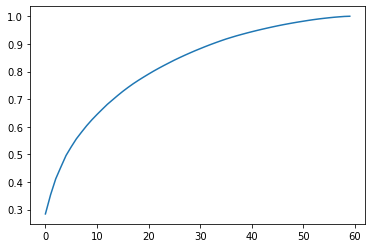

In [60]:
plt.plot(range(60),pca.explained_variance_ratio_.cumsum())
plt.show()

In [61]:
#On va tenter une réduction de dimension à 20 variables:
pca=PCA(n_components=20)

In [62]:
pca.fit(X_std)

PCA(n_components=20)

In [63]:
X_proj=pca.transform(X_std)

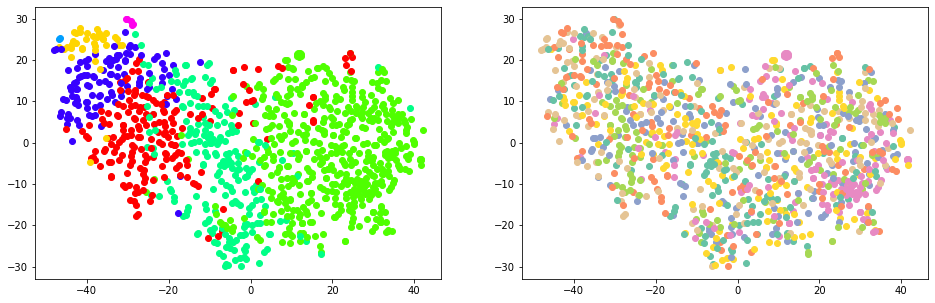

In [64]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_proj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=7)
kmean.fit(X_proj)
y=kmean.predict(X_proj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [65]:
adjusted_rand_score(y,df['cluster'])

0.03496576089020165

In [66]:
kpca=KernelPCA(kernel='rbf')
kpca.fit(X_std)


KernelPCA(kernel='rbf')

In [67]:
X_kproj=kpca.transform(X_std)

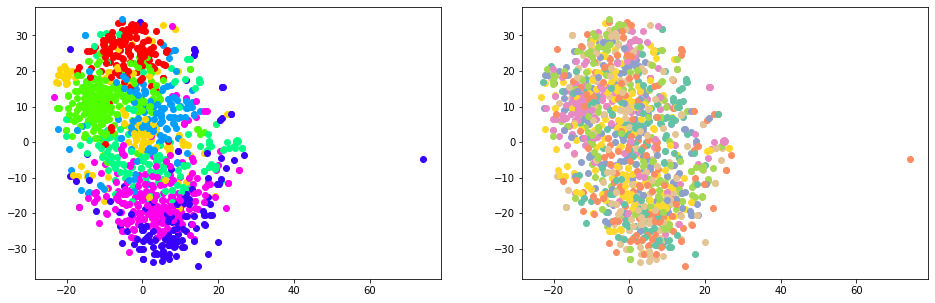

In [68]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_kproj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=7)
kmean.fit(X_kproj)
y=kmean.predict(X_kproj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [69]:
adjusted_rand_score(y,df['cluster'])

0.0382005608670454

# On essai avec les image au format VGG16

In [86]:
data.head(1)

uniq_id                                 image  \
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

         categorie                                         imagevgg16  \
0  Home Furnishing  [[[206, 204, 192], [205, 203, 191], [205, 202,...   

                                       image_origine  \
0  [[[192, 184, 173], [192, 184, 173], [193, 185,...   

                                          image_resh  \
0  [[[203, 198, 188], [203, 198, 188], [203, 197,...   

                                            image_nb  
0  [[198, 198, 198, 198, 198, 200, 200, 199, 199,...

In [83]:
data.iloc[0]['imagevgg16'].dtype

dtype('float32')

In [84]:
data.iloc[0]['image_resh'].dtype

dtype('uint8')

In [27]:
#On les mets en noir et blanc:
data['imagevgg16']=data['imagevgg16'].apply(lambda x: x.astype(uint8))

In [28]:
data['image_vggnb']=data['imagevgg16'].apply(lambda x: np.array(Image.fromarray(x).convert('L')))

In [52]:
test=data.iloc[400]['image_vggnb']

In [89]:
#On va partir la dessus on fait un test:
sf =data.iloc[400]['image_vggnb']
img=data.iloc[400]['image_resh']

sift=cv2.SIFT_create()
(kps, descs) = sift.detectAndCompute(sf, None)


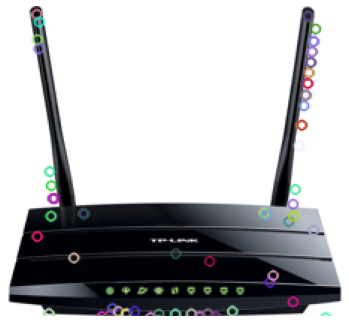

In [90]:
img2 = cv2.drawKeypoints(img, kps[:100], outImage=None) 
plt.figure(figsize = (6,6))
plt.imshow(img2)
plt.axis('off')
plt.show()

In [92]:
def extracteur_desc_Sift(image):
    sift=cv2.SIFT_create()
    (kps, desc) = sift.detectAndCompute(image, None)
    return desc

In [93]:
#On va mettre nos descripterus dans le table
data["siftVGG"]=data["image_vggnb"].apply(extracteur_desc_Sift)

In [94]:
data["siftVGG"].apply(lambda x:size(x)).describe()

count      1050.000000
mean      31151.665714
std       22171.146990
min           1.000000
25%       14592.000000
50%       26880.000000
75%       41216.000000
max      243200.000000
Name: siftVGG, dtype: float64

In [97]:
#On crée un tableau de descripteurs:
descr=data.loc[0,"siftVGG"]
for i in range(1,data.shape[0]):
    if size(data.loc[i,"siftVGG"])>1:
        descr=np.vstack([descr,data.loc[i,"siftVGG"]])

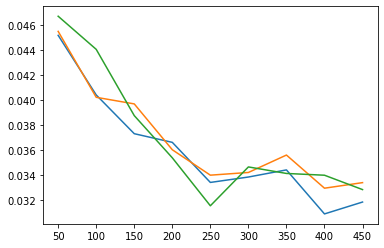

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#on va voir comment clusteriser ces descripteurs:
for i in range(3):
    #Je prends un échantillon d'environ 10% du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,30000)
    sil=[]
    for i in range(50,500,50):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,500,50),sil)
plt.show()  
    

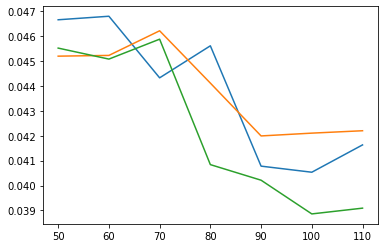

In [99]:
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,20000)
    sil=[]
    for i in range(50,120,10):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,120,10),sil)
plt.show()  

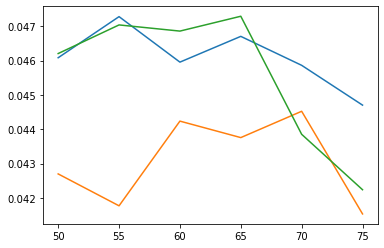

In [100]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,20000)
    sil=[]
    for i in range(50,80,5):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,80,5),sil)
plt.show()  

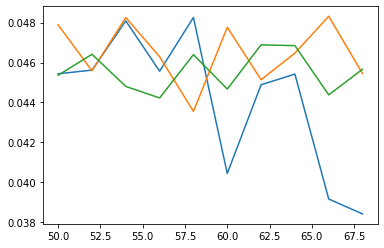

In [101]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,20000)
    sil=[]
    for i in range(50,70,2):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,70,2),sil)
plt.show() 

In [105]:
#On va partir sur 64 clusters
#regardons ce que ça donne:
km=KMeans(n_clusters=64)
km.fit(descr)
y=km.predict(descr)
print(silhouette_score(descr,y))

0.04240869


In [106]:
#On a donc notre cluster
#on va construire un df avec 64 features et pour chaque image on indiquera combien de descripteurs de chaque
#cluster elle contient:

df=data[['categorie',"siftVGG"]].copy()
df.head()


categorie                                            siftVGG
0  Home Furnishing  [[0.0, 0.0, 39.0, 51.0, 5.0, 1.0, 1.0, 1.0, 0....
1        Baby Care  [[5.0, 2.0, 0.0, 1.0, 7.0, 30.0, 40.0, 3.0, 15...
2        Baby Care  [[6.0, 28.0, 133.0, 19.0, 7.0, 2.0, 0.0, 0.0, ...
3  Home Furnishing  [[8.0, 26.0, 76.0, 19.0, 12.0, 2.0, 4.0, 5.0, ...
4  Home Furnishing  [[18.0, 32.0, 8.0, 1.0, 0.0, 1.0, 1.0, 1.0, 24...

In [107]:
for i in range(60):
    df[i]=np.zeros(df.shape[0])

 

In [109]:
km.predict(df.iloc[0]['siftVGG'])

array([50, 52, 48, 17, 30, 50, 53, 29, 23, 28, 40, 31, 28, 29, 48, 34, 62,
       58, 46, 58, 51, 51, 24, 11, 51, 51, 51, 17, 11, 54, 40, 47, 40, 15,
       47, 19,  6, 13, 35, 13, 15, 42, 15, 24, 48, 43,  8, 56, 56, 57, 57,
       57, 57, 57, 32,  1, 32, 32, 32, 27, 32, 32, 45, 32, 32, 27, 27, 32,
       27, 27, 32, 32, 41, 23,  2, 23, 59, 59, 43, 55, 55, 43, 62, 54, 54,
       33,  9, 42, 15, 42, 49,  5, 16, 33, 27, 33,  9, 49, 33, 33, 23,  5,
       29,  4, 62, 46,  7, 24, 32, 24, 24, 38, 47, 43, 11, 58, 60, 16, 36,
       32, 32, 15, 41, 32, 33, 42, 42, 49,  3, 59, 15,  9, 33,  7,  7, 24,
       24, 43, 57, 43, 59,  4, 63, 12, 11, 39, 22, 47, 24, 40, 24, 63, 50,
       35, 50, 17, 48, 19, 50, 14, 14, 13, 19, 57, 60, 27, 27,  9, 33, 48,
       13, 57, 57, 22, 42, 15, 18, 50, 24, 17, 49,  5, 43, 39, 63,  8,  8,
        8,  4, 13, 57, 57,  3,  8, 56, 48, 56, 56, 45, 57, 57, 32, 23, 32,
       32, 32, 32, 32, 32, 32, 32, 27, 27,  9, 27, 27,  2, 16, 39, 59, 46,
       55, 54,  2,  9, 51

In [113]:
def features(row,k):
    n=0
    if size(row['siftVGG'])==1:
        return 0
    for i in km.predict(row['siftVGG']):
        if i==k:
            n+=1
    return n

In [114]:
for i in range(64):
    df[i]=df.apply(lambda x: features(x,i),axis=1)

In [115]:
df

categorie                                            siftVGG   0  \
0     Home Furnishing  [[0.0, 0.0, 39.0, 51.0, 5.0, 1.0, 1.0, 1.0, 0....   2   
1           Baby Care  [[5.0, 2.0, 0.0, 1.0, 7.0, 30.0, 40.0, 3.0, 15...   1   
2           Baby Care  [[6.0, 28.0, 133.0, 19.0, 7.0, 2.0, 0.0, 0.0, ...  13   
3     Home Furnishing  [[8.0, 26.0, 76.0, 19.0, 12.0, 2.0, 4.0, 5.0, ...   5   
4     Home Furnishing  [[18.0, 32.0, 8.0, 1.0, 0.0, 1.0, 1.0, 1.0, 24...   4   
...               ...                                                ...  ..   
1045        Baby Care  [[54.0, 89.0, 47.0, 0.0, 0.0, 0.0, 1.0, 36.0, ...  10   
1046        Baby Care  [[0.0, 0.0, 0.0, 3.0, 27.0, 10.0, 0.0, 0.0, 63...   1   
1047        Baby Care  [[10.0, 5.0, 0.0, 12.0, 158.0, 18.0, 5.0, 1.0,...   6   
1048        Baby Care  [[127.0, 8.0, 17.0, 2.0, 0.0, 1.0, 0.0, 13.0, ...   0   
1049        Baby Care  [[25.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 4.0, 16....   0   

      1   2   3   4  5   6   7  ...  54  55  56  57  58  59  60  61  62  63  
0     3   3   2   4  6   1   3  ...   5   3   5  16   4   7   3   3   5   3  
1     1   4   3   2  1   2   1  ...   5   2  21   1   2   1   4   0   2   4  
2     4   0  22   4  1   0   2  ...   8   1  18  56   0   8   2   2   2   1  
3     3  28   8  16  7   1  33  ...   6   0  11   4  80   2  16   5   5   4  
4     3  43   6   2  2   2   6  ...   4  22   5   1  17   1   4   4   5   5  
...  ..  ..  ..  .. ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
1045  5   0   8   4  1   8   1  ...   6  16   1   0   1   1   0   3   6   0  
1046  4   2   2   5  3   7   0  ...   4   4   2   0   5   0   2   4   3   0  
1047  4  11   3   5  7  12   5  ...   9  13   8   1   5   1   6   3  20   5  
1048  6   0   2   1  4   1   1  ...   0   0   9   4   1   0   2   2   2   0  
1049  1   9   0  15  0  15   6  ...  11  22   0   1   3   2  12   2   8   0  

[1050 rows x 66 columns]

In [116]:
X=df.drop(['categorie','siftVGG'],axis=1).values

<ipython-input-117-04f1b3d29dca>:21: UserWarning: Legend does not support 0.0925916424949428 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-117-04f1b3d29dca>:24: UserWarning: Legend does not support 0.0925916424949428 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-117-04f1b3d29dca>:21: UserWarning: Legend does not support 0.12616962474928603 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-inp

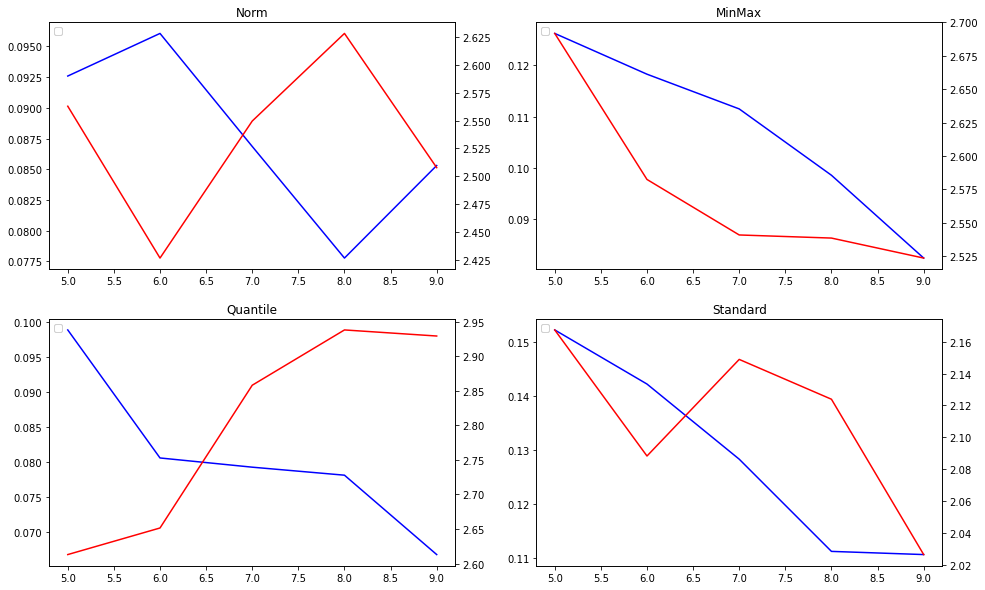

In [117]:
#On standardise et on regarde ce que ça donne:

from sklearn.preprocessing import Normalizer,MinMaxScaler,QuantileTransformer,StandardScaler
from sklearn.metrics import davies_bouldin_score

Trans=[Normalizer(),MinMaxScaler(),QuantileTransformer(),StandardScaler()]
Name=['Norm','MinMax','Quantile','Standard']
fig=figure(figsize=(16,10))
for i in range (4):
    sil=[]
    DB=[]
    X_trans=Trans[i].fit_transform(X)
    for n in range (5,10):
        kmean=KMeans(n_clusters=n)
        kmean.fit(X_trans)
        y=kmean.predict(X_trans)
        sil.append(silhouette_score(X_trans,y))
        DB.append(davies_bouldin_score(X_trans,y))
    plt.subplot(2,2,i+1)
    plt.plot(range(5,10),sil,c='b')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    ax2 = pyplot.gca().twinx()
    plt.plot(range(5,10),DB,c='r')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    plt.title(Name[i])
plt.show()

In [119]:
def cat(x):
    if x=='Home Furnishing':
        return 1
    if x=='Kitchen & Dining':
        return 2
    if x=='Computers':
        return 3
    if x=='Beauty and Personal Care':
        return 4
    if x=='Watches':
        return 5
    if x=='Baby Care':
        return 6
    else:
        return 0

In [120]:
df['cluster']=df['categorie'].apply(lambda x : cat(x))

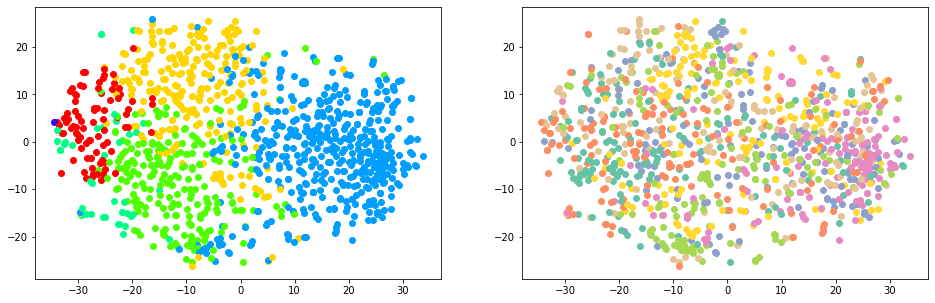

In [121]:
from sklearn.manifold import TSNE
#On regarde ce que ça donne avec 6 clusters:
#Avec un Standard Scaler
tsne=TSNE(n_components=2)
X_std=StandardScaler().fit_transform(X)
X_trans=tsne.fit_transform(X_std)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=6)
kmean.fit(X_std)
y=kmean.predict(X_std)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [122]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y,df['cluster'])

0.04545847413267474

In [ ]:
#C'est un peu mieux mais c'est pas famuex...

In [123]:
from sklearn.decomposition import PCA,KernelPCA

In [125]:
pca=PCA(n_components=64)
pca.fit(X_std)


PCA(n_components=64)

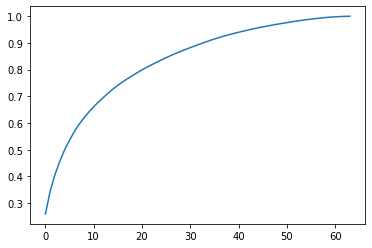

In [126]:
plt.plot(range(64),pca.explained_variance_ratio_.cumsum())
plt.show()

In [136]:
#On va tenter une réduction de dimension à 20 variables:
pca=PCA(n_components=10)

In [137]:
pca.fit(X_std)

PCA(n_components=10)

In [138]:
X_proj=pca.transform(X_std)

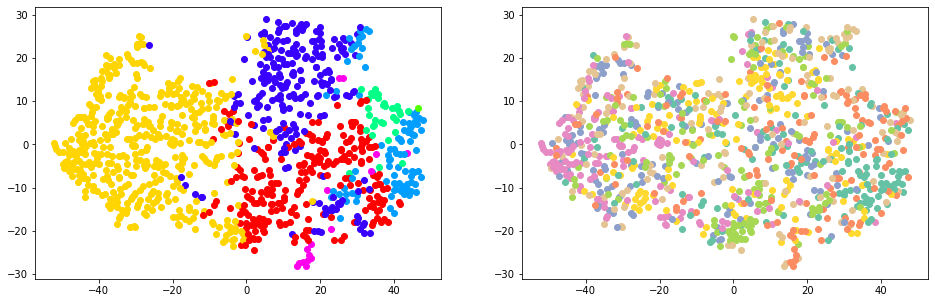

In [139]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_proj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=7)
kmean.fit(X_proj)
y=kmean.predict(X_proj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [140]:
adjusted_rand_score(y,df['cluster'])

0.046587556939039265

In [132]:
kpca=KernelPCA(kernel='rbf')
kpca.fit(X_std)


KernelPCA(kernel='rbf')

In [133]:
X_kproj=kpca.transform(X_std)

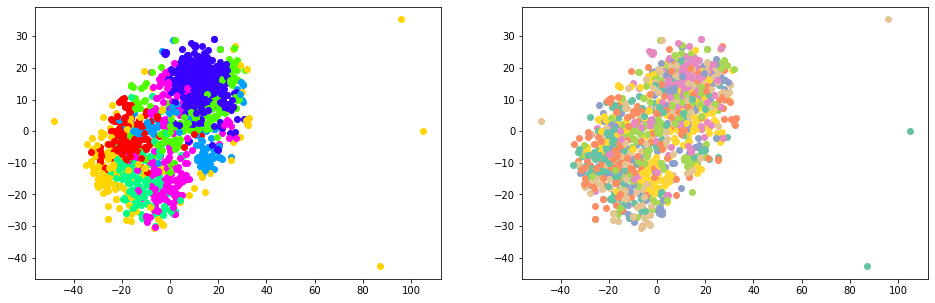

In [134]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_kproj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=7)
kmean.fit(X_kproj)
y=kmean.predict(X_kproj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [135]:
adjusted_rand_score(y,df['cluster'])

0.0697422553603081

In [ ]:
#On a encore un peu amélioré

# On essai SURF

In [29]:
sf =data.iloc[400]['image_nbcont']
img=data.iloc[400]['image_resh']

In [44]:
#Create SURF object. 
surf = cv2.xfeatures2d.SURF_create()
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)



error: OpenCV(4.4.0) /tmp/pip-req-build-zeowd5_m/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1027: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


# On essai ORB

In [45]:
data.head(1)

uniq_id                                 image  \
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

         categorie                                         imagevgg16  \
0  Home Furnishing  [[[206, 204, 192], [205, 203, 191], [205, 202,...   

                                       image_origine  \
0  [[[192, 184, 173], [192, 184, 173], [193, 185,...   

                                          image_resh  \
0  [[[203, 198, 188], [203, 198, 188], [203, 197,...   

                                            image_nb  \
0  [[198, 198, 198, 198, 198, 200, 200, 199, 199,...   

                                        image_nbcont  \
0  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   

                                         image_vggnb  
0  [[203, 202, 202, 203, 202, 203, 202, 204, 202,...

## D'abord sur l'image brute reshappée en 224 224

In [46]:
sf =data.iloc[400]['image_nb']
img=data.iloc[400]['image_resh']

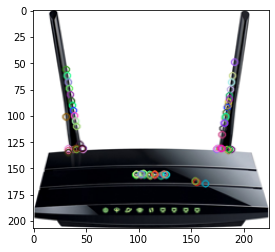

(<matplotlib.image.AxesImage at 0x7f06cb0eedc0>, None)

In [47]:
# Initiate STAR detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
kp, des = orb.detectAndCompute(sf,None)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,kp,outImage=None)
plt.imshow(img2),plt.show()

In [50]:
#On va extraire les descripteurs des photos:
data['ORB_orig']=data['image_nb'].apply(lambda x:orb.detectAndCompute(x,None)[1])

In [55]:
data['ORB_orig'].apply(lambda x: size(x)).describe()

count     1050.000000
mean      7763.956190
std       4158.823788
min          1.000000
25%       4264.000000
50%       8416.000000
75%      11360.000000
max      14240.000000
Name: ORB_orig, dtype: float64

In [63]:
#J'extrait tous mes descripteurs
descr=data.iloc[0]['ORB_orig']
for i in range(1,1050):
    if size(data.iloc[i]['ORB_orig'])>1:
        descr=np.vstack((descr,data.iloc[i]['ORB_orig']))

In [69]:
size(descr)/32

254754.0

In [ ]:
#On va faire un Kmean sur 10% de ces 250000 descripteurs:

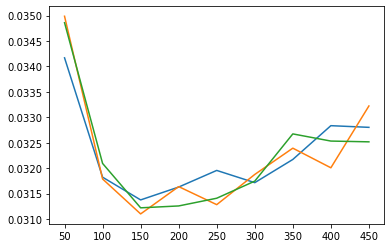

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#on va voir comment clusteriser ces descripteurs:
for i in range(3):
    #Je prends un échantillon d'environ 10% du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,25000)
    sil=[]
    for i in range(50,500,50):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,500,50),sil)
plt.show()  
    

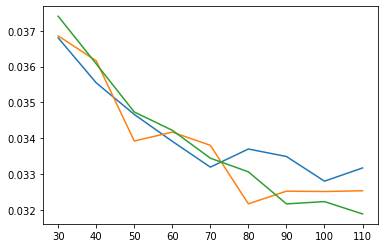

In [71]:
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,25000)
    sil=[]
    for i in range(30,120,10):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(30,120,10),sil)
plt.show()  

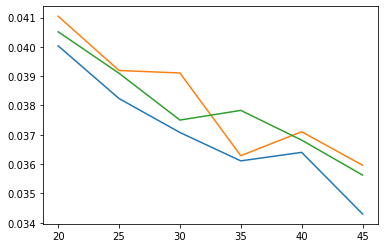

In [73]:
#On essai entre 20 et 50 sur des échantillons plus réduits
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,10000)
    sil=[]
    for i in range(20,50,5):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(20,50,5),sil)
plt.show()  

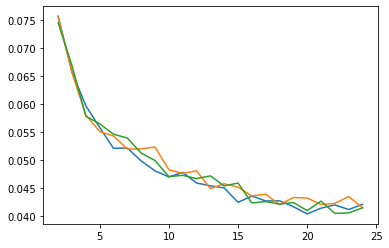

In [78]:
#On essai entre 2 et 25
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,5000)
    sil=[]
    for i in range(2,25,1):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(2,25),sil)
plt.show() 

In [79]:
#On va partir sur 25 clusters
#regardons ce que ça donne:
km=KMeans(n_clusters=25)
km.fit(descr)
y=km.predict(descr)
print(silhouette_score(descr,y))

0.036595768635780145


In [81]:
#On a donc notre cluster
#on va construire un df avec 64 features et pour chaque image on indiquera combien de descripteurs de chaque
#cluster elle contient:

df=data[['categorie',"ORB_orig"]].copy()
df.head()


categorie                                           ORB_orig
0  Home Furnishing  [[246, 205, 237, 254, 252, 34, 94, 175, 19, 17...
1        Baby Care  [[140, 207, 126, 118, 154, 178, 63, 244, 212, ...
2        Baby Care  [[190, 124, 241, 114, 162, 124, 94, 150, 57, 2...
3  Home Furnishing  [[109, 127, 247, 33, 182, 170, 227, 146, 108, ...
4  Home Furnishing  [[100, 0, 249, 232, 238, 121, 81, 10, 15, 175,...

In [82]:
for i in range(25):
    df[i]=np.zeros(df.shape[0])

 

In [83]:
km.predict(df.iloc[0]['ORB_orig'])

array([14,  6, 17, 17, 17, 14,  6,  0,  6, 12, 17, 17,  6, 22, 22, 17, 14,
       12, 21,  4, 14, 17,  4, 17,  1, 17, 12, 11, 20, 17,  7,  3, 17,  3,
       17, 14, 17, 20, 17, 20, 11, 22, 14, 17, 22, 17,  1, 17, 11, 18, 12,
       17, 17, 17, 22, 22, 17, 22, 17, 17, 17, 14, 17, 16, 17, 17, 17, 22,
        4, 17, 12,  4, 22, 17,  1, 12, 14,  6,  3, 17,  1, 21, 17, 17,  1,
       19, 17,  4,  0,  0,  1, 10, 17,  3,  3, 17,  4, 17,  3,  3,  3, 17,
       24, 17,  3,  1, 14, 17,  6,  3,  4, 12, 12, 14, 22,  3,  1,  1,  4,
        4, 16, 12,  3,  1,  4, 12, 17, 12,  3, 17, 16, 11, 17, 14, 17,  4,
        4,  4, 17,  4, 17,  0,  1,  3, 22,  4,  1, 22, 22,  1,  4,  4, 14,
       17, 10, 11, 11,  1,  4,  4, 20,  3,  1, 22, 14,  4, 22,  3, 12, 22,
       12,  3, 21, 17,  1, 14,  3,  1, 22, 16, 12, 17, 17,  4, 12, 22, 22,
       22,  1, 21, 17, 14,  1, 14,  4, 17,  0, 17,  1, 14,  3, 19, 20, 22,
        4,  1,  5,  1,  9,  8, 12, 20, 20, 22, 22,  1, 17, 17, 22, 17,  1,
       17, 20,  4, 11,  1

In [84]:
def features(row,k):
    n=0
    if size(row['ORB_orig'])==1:
        return 0
    for i in km.predict(row['ORB_orig']):
        if i==k:
            n+=1
    return n

In [85]:
for i in range(25):
    df[i]=df.apply(lambda x: features(x,i),axis=1)

In [86]:
df

categorie                                           ORB_orig   0  \
0     Home Furnishing  [[246, 205, 237, 254, 252, 34, 94, 175, 19, 17...  10   
1           Baby Care  [[140, 207, 126, 118, 154, 178, 63, 244, 212, ...   1   
2           Baby Care  [[190, 124, 241, 114, 162, 124, 94, 150, 57, 2...  11   
3     Home Furnishing  [[109, 127, 247, 33, 182, 170, 227, 146, 108, ...  11   
4     Home Furnishing  [[100, 0, 249, 232, 238, 121, 81, 10, 15, 175,...  28   
...               ...                                                ...  ..   
1045        Baby Care  [[53, 23, 66, 131, 182, 51, 234, 112, 45, 196,...   8   
1046        Baby Care  [[18, 141, 66, 137, 182, 131, 46, 231, 52, 1, ...   2   
1047        Baby Care  [[50, 147, 55, 193, 166, 202, 145, 109, 93, 24...  22   
1048        Baby Care  [[131, 197, 46, 189, 252, 167, 110, 249, 159, ...  15   
1049        Baby Care  [[242, 132, 104, 173, 205, 107, 80, 107, 87, 4...  32   

       1   2   3   4   5   6   7  ...  15  16  17  18  19  20  21  22  23  24  
0     71   6  20  26   4   9   2  ...   0   9  61   4   2  19   8  53   0   1  
1      3   8   6  11  11   0   5  ...  11  12   7   4   2   2   9   3   0  12  
2     13  26  15   2  19   6  14  ...  17  10   9   5   8  15  12   8   5  10  
3      5   8  30  19  10   9   5  ...   4   9  25   9   2   7  24  32   1   9  
4     27  22   2  19  11  11   9  ...  18  24   8  12   2   9  15  14   1  13  
...   ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
1045  16  16   7   9  18  10  20  ...  20  10   8  10  27  10   6   4  38  22  
1046   8   5   6   9  17  22  21  ...   4   4  15   3  24   9   9   5  16  15  
1047  25  35   6  15  22  11  15  ...  26  22   7  19  29  13  13   5  18  19  
1048  20  19   5  17  12  13  11  ...   4  27  10   6   4  10   5   4  19   2  
1049  12   8   9  21  23   7  25  ...  40  31   3  16  22  25  22   2  20  12  

[1050 rows x 27 columns]

In [87]:
X=df.drop(['categorie','ORB_orig'],axis=1).values

<ipython-input-88-7e917bcc0990>:21: UserWarning: Legend does not support 0.1158051921908119 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-88-7e917bcc0990>:24: UserWarning: Legend does not support 0.1158051921908119 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-88-7e917bcc0990>:21: UserWarning: Legend does not support 0.18789790928712088 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-

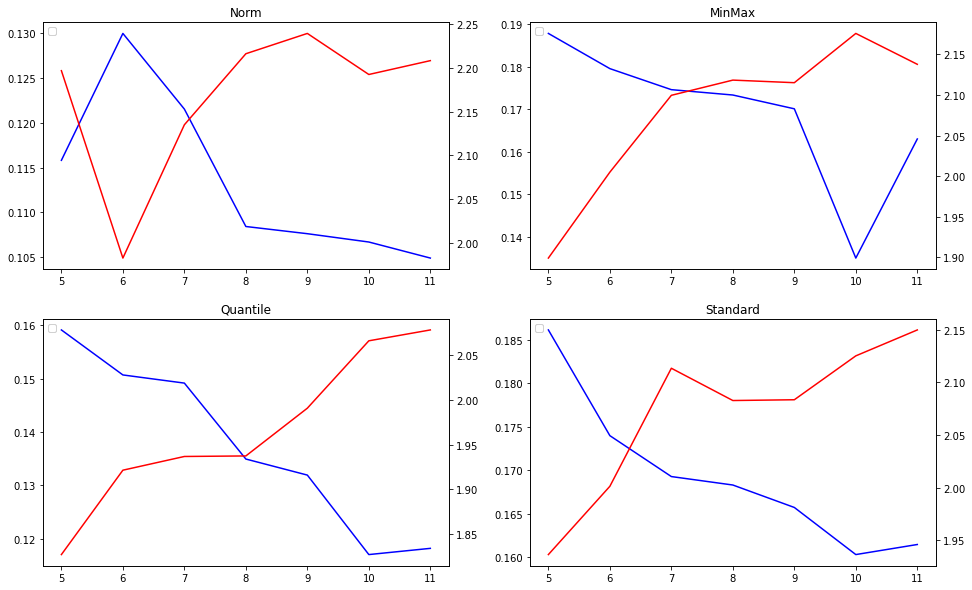

In [88]:
#On standardise et on regarde ce que ça donne:

from sklearn.preprocessing import Normalizer,MinMaxScaler,QuantileTransformer,StandardScaler
from sklearn.metrics import davies_bouldin_score

Trans=[Normalizer(),MinMaxScaler(),QuantileTransformer(),StandardScaler()]
Name=['Norm','MinMax','Quantile','Standard']
fig=figure(figsize=(16,10))
for i in range (4):
    sil=[]
    DB=[]
    X_trans=Trans[i].fit_transform(X)
    for n in range (5,12):
        kmean=KMeans(n_clusters=n)
        kmean.fit(X_trans)
        y=kmean.predict(X_trans)
        sil.append(silhouette_score(X_trans,y))
        DB.append(davies_bouldin_score(X_trans,y))
    plt.subplot(2,2,i+1)
    plt.plot(range(5,12),sil,c='b')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    ax2 = pyplot.gca().twinx()
    plt.plot(range(5,12),DB,c='r')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    plt.title(Name[i])
plt.show()

In [90]:
def cat(x):
    if x=='Home Furnishing':
        return 1
    if x=='Kitchen & Dining':
        return 2
    if x=='Computers':
        return 3
    if x=='Beauty and Personal Care':
        return 4
    if x=='Watches':
        return 5
    if x=='Baby Care':
        return 6
    else:
        return 0

In [91]:
df['cluster']=df['categorie'].apply(lambda x : cat(x))

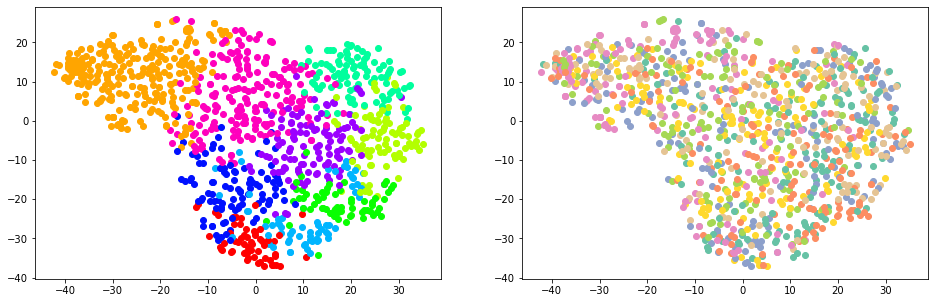

In [108]:
from sklearn.manifold import TSNE
#On regarde ce que ça donne avec 9 clusters:
#Avec un Standard Scaler
tsne=TSNE(n_components=2)
X_std=MinMaxScaler().fit_transform(X)
X_trans=tsne.fit_transform(X_std)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=9)
kmean.fit(X_std)
y=kmean.predict(X_std)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(9):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/9))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [93]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y,df['cluster'])

0.030327021437709583

In [ ]:
#C'est pas famuex...

In [94]:
from sklearn.decomposition import PCA,KernelPCA

In [96]:
pca=PCA(n_components=25)
pca.fit(X_std)


PCA(n_components=25)

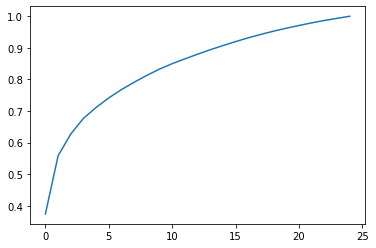

In [97]:
plt.plot(range(25),pca.explained_variance_ratio_.cumsum())
plt.show()

In [98]:
#On va tenter une réduction de dimension à 20 variables:
pca=PCA(n_components=4)

In [99]:
pca.fit(X_std)

PCA(n_components=4)

In [100]:
X_proj=pca.transform(X_std)

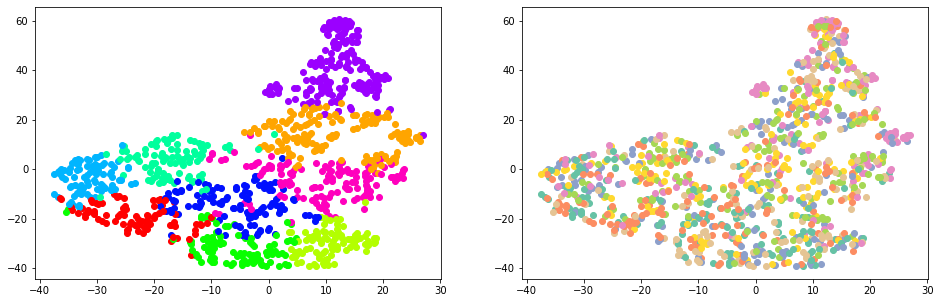

In [109]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_proj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=9)
kmean.fit(X_proj)
y=kmean.predict(X_proj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(9):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/9))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [103]:
adjusted_rand_score(y,df['cluster'])

0.032411173583328935

In [ ]:
#Un peu mieux mais pas top...

In [104]:
kpca=KernelPCA(kernel='rbf')
kpca.fit(X_std)


KernelPCA(kernel='rbf')

In [105]:
X_kproj=kpca.transform(X_std)

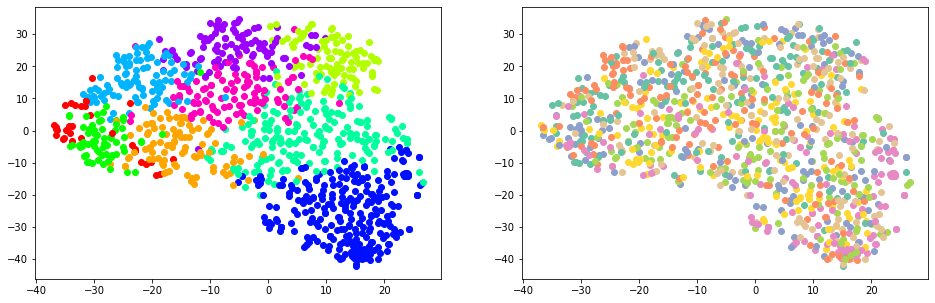

In [110]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_kproj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=9)
kmean.fit(X_kproj)
y=kmean.predict(X_kproj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(9):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/9))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [112]:
adjusted_rand_score(y,df['cluster'])

0.03596961203187211

In [ ]:
#On a encore un peu amélioré mais c'est toujours pas génial...

## Avec l'image contrastée:

In [80]:
data.head(1)

uniq_id                                 image  \
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

         categorie                                         imagevgg16  \
0  Home Furnishing  [[[206, 204, 192], [205, 203, 191], [205, 202,...   

                                       image_origine  \
0  [[[192, 184, 173], [192, 184, 173], [193, 185,...   

                                          image_resh  \
0  [[[203, 198, 188], [203, 198, 188], [203, 197,...   

                                            image_nb  \
0  [[198, 198, 198, 198, 198, 200, 200, 199, 199,...   

                                        image_nbcont  \
0  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   

                                         image_vggnb  \
0  [[203, 202, 202, 203, 202, 203, 202, 204, 202,...   

                                            ORB_orig  
0  [[246, 205, 237, 254, 252, 34, 94, 175, 19, 17...

In [113]:
sf =data.iloc[400]['image_nbcont']
img=data.iloc[400]['image_resh']

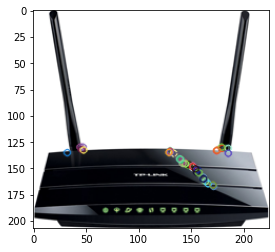

(<matplotlib.image.AxesImage at 0x7f067deea0d0>, None)

In [114]:
# Initiate STAR detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
kp, des = orb.detectAndCompute(sf,None)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,kp,outImage=None)
plt.imshow(img2),plt.show()

In [115]:
#On va extraire les descripteurs des photos:
data['ORB_cont']=data['image_nbcont'].apply(lambda x:orb.detectAndCompute(x,None)[1])

In [116]:
data['ORB_cont'].apply(lambda x: size(x)).describe()

count     1050.000000
mean      4071.448571
std       3535.443507
min          1.000000
25%       1024.000000
50%       3024.000000
75%       6560.000000
max      14336.000000
Name: ORB_cont, dtype: float64

In [117]:
#J'extrait tous mes descripteurs
descr=data.iloc[0]['ORB_cont']
for i in range(1,1050):
    if size(data.iloc[i]['ORB_cont'])>1:
        descr=np.vstack((descr,data.iloc[i]['ORB_cont']))

In [118]:
size(descr)/32

133593.0

In [ ]:
#On va faire un Kmean sur 10% de ces 150000 descripteurs:

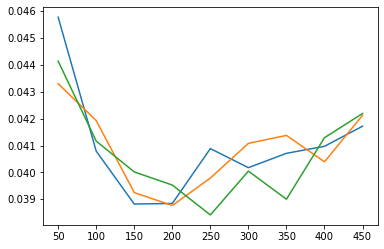

In [119]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#on va voir comment clusteriser ces descripteurs:
for i in range(3):
    #Je prends un échantillon d'environ 10% du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,15000)
    sil=[]
    for i in range(50,500,50):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,500,50),sil)
plt.show()  
    

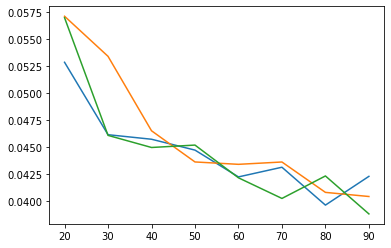

In [121]:
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,15000)
    sil=[]
    for i in range(20,100,10):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(20,100,10),sil)
plt.show()  

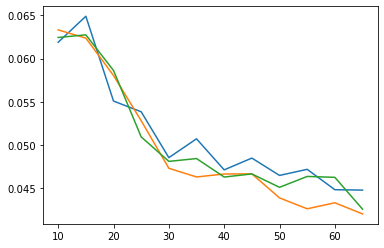

In [123]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,10000)
    sil=[]
    for i in range(10,70,5):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(10,70,5),sil)
plt.show()  

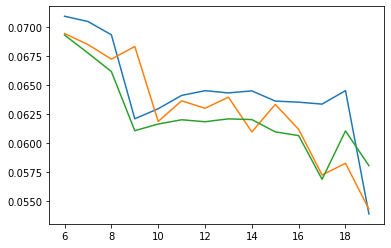

In [124]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,10000)
    sil=[]
    for i in range(6,20,1):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(6,20),sil)
plt.show() 

In [125]:
#On va partir sur 15 clusters
#regardons ce que ça donne:
km=KMeans(n_clusters=15)
km.fit(descr)
y=km.predict(descr)
print(silhouette_score(descr,y))

0.06262364088063349


In [129]:
#On a donc notre cluster
#on va construire un df avec 64 features et pour chaque image on indiquera combien de descripteurs de chaque
#cluster elle contient:

df=data[['categorie',"ORB_cont"]].copy()
df.head()


categorie                                           ORB_cont
0  Home Furnishing  [[20, 172, 132, 191, 189, 201, 78, 172, 159, 1...
1        Baby Care  [[114, 32, 82, 129, 108, 9, 104, 64, 45, 32, 2...
2        Baby Care  [[82, 175, 169, 161, 154, 65, 155, 142, 18, 16...
3  Home Furnishing  [[67, 4, 194, 5, 82, 10, 106, 32, 57, 128, 106...
4  Home Furnishing  [[99, 56, 112, 80, 97, 157, 120, 23, 249, 73, ...

In [127]:
for i in range(15):
    df[i]=np.zeros(df.shape[0])

 

In [130]:
km.predict(df.iloc[0]['ORB_cont'])

array([ 5,  7,  2,  0,  2,  0, 10,  2,  0,  0,  9,  6,  0,  6, 14,  2,  8,
        6,  9,  6,  7,  7, 10,  2,  0,  5,  6,  0,  6,  2,  8,  2,  5, 13,
        8,  8,  2,  2,  2,  5,  2,  1,  1,  2,  2,  6,  2, 11,  0,  2,  0,
        1,  1,  2,  2,  6,  0,  0,  0,  6,  6,  5,  3,  2,  2,  9,  5,  5,
        5,  5,  5,  9,  2,  5,  5,  6,  2,  6,  6,  9,  9,  9,  0,  9,  9,
        7,  7,  0,  0,  2,  5,  2,  6,  5,  5,  7,  2,  6,  6,  2,  0,  8,
        2,  6,  2,  5,  3,  5, 10, 11,  5,  5,  5,  9,  9,  2,  0,  8,  2,
       13,  2,  5, 13,  2,  9,  1, 13,  1,  5,  1,  4,  6,  0,  8,  5, 13,
        6,  6,  5,  6,  0,  0,  5, 13,  5,  0,  9,  9,  5,  5,  5,  5, 11,
       11,  0,  0,  5,  5,  5,  5,  5,  5,  5,  9,  6,  6,  0,  5,  5,  0,
        8,  8,  5,  8,  5,  5,  5,  5,  0,  6,  5,  0,  5,  0,  5,  0,  1,
        4,  8,  8,  4,  2,  2,  4, 14,  2,  0,  5,  2,  5,  0,  2,  2,  2,
        2,  0,  2,  5,  6,  9,  2,  5,  5, 11,  5,  2,  5,  9,  2,  2,  8,
       10,  0,  3,  5, 13

In [131]:
def features(row,k):
    n=0
    if size(row['ORB_cont'])==1:
        return 0
    for i in km.predict(row['ORB_cont']):
        if i==k:
            n+=1
    return n

In [132]:
for i in range(15):
    df[i]=df.apply(lambda x: features(x,i),axis=1)

In [133]:
df

categorie                                           ORB_cont   0  \
0     Home Furnishing  [[20, 172, 132, 191, 189, 201, 78, 172, 159, 1...  49   
1           Baby Care  [[114, 32, 82, 129, 108, 9, 104, 64, 45, 32, 2...   0   
2           Baby Care  [[82, 175, 169, 161, 154, 65, 155, 142, 18, 16...  19   
3     Home Furnishing  [[67, 4, 194, 5, 82, 10, 106, 32, 57, 128, 106...  11   
4     Home Furnishing  [[99, 56, 112, 80, 97, 157, 120, 23, 249, 73, ...  34   
...               ...                                                ...  ..   
1045        Baby Care  [[6, 147, 246, 91, 155, 242, 184, 217, 63, 93,...   8   
1046        Baby Care  [[56, 13, 10, 170, 20, 131, 234, 120, 20, 0, 2...   1   
1047        Baby Care  [[166, 204, 96, 154, 84, 131, 194, 228, 87, 0,...  18   
1048        Baby Care  [[33, 32, 81, 193, 108, 13, 225, 72, 107, 40, ...   5   
1049        Baby Care  [[2, 201, 130, 159, 18, 128, 42, 198, 172, 1, ...  24   

       1   2   3   4   5   6   7   8   9  10  11  12  13  14  
0     12  87   3   5  67  25   8  15  19   7   6   0  10   9  
1      0   1   0   1   0   0   0   0   0   0   0   0   0   0  
2     17  14  20   3  20   5  17  14  13  11   5   5  11  36  
3      6  18  24  17  28   9   7  32  11  10  16   1  11   9  
4     13   5  26   1  35  12  12  34  34  49  16  10  35  11  
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
1045   6   8   8   0   8  38   1   6  14  12   0  60  26   4  
1046   5  12   3   0   1  11   1   1   4   6   5  41  17   2  
1047  31   1  22   6  32  53  14  34  32  56   7  14  34   6  
1048  14  37   0   1   2   7   0   5   2  13  15  14   9   7  
1049  22   3  32   1  56  41  37  45  39  28   5  15  18  12  

[1050 rows x 17 columns]

In [134]:
X=df.drop(['categorie','ORB_cont'],axis=1).values

<ipython-input-135-7e917bcc0990>:21: UserWarning: Legend does not support 0.250361033155981 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-135-7e917bcc0990>:24: UserWarning: Legend does not support 0.250361033155981 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-135-7e917bcc0990>:21: UserWarning: Legend does not support 0.31258467589438266 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input

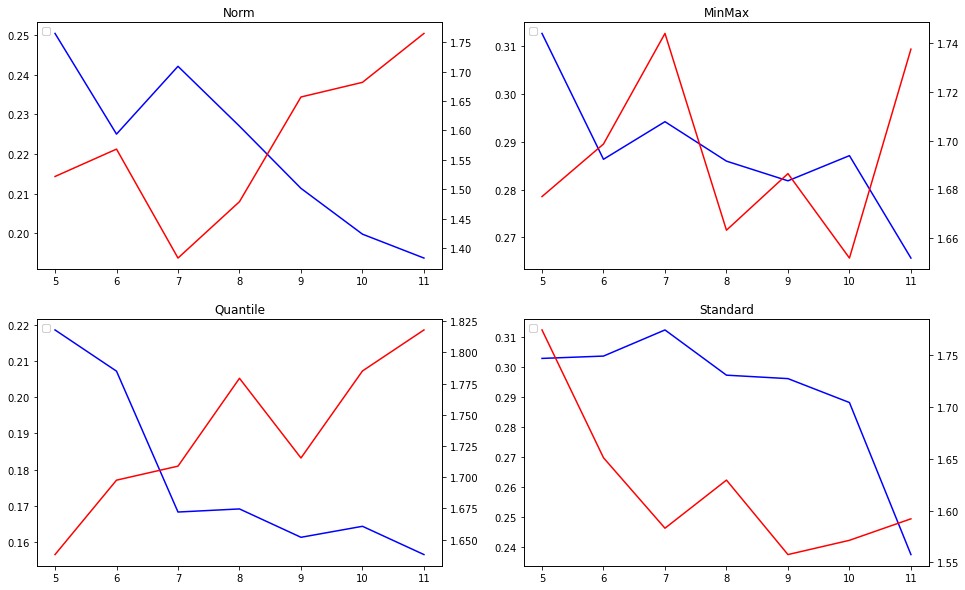

In [135]:
#On standardise et on regarde ce que ça donne:

from sklearn.preprocessing import Normalizer,MinMaxScaler,QuantileTransformer,StandardScaler
from sklearn.metrics import davies_bouldin_score

Trans=[Normalizer(),MinMaxScaler(),QuantileTransformer(),StandardScaler()]
Name=['Norm','MinMax','Quantile','Standard']
fig=figure(figsize=(16,10))
for i in range (4):
    sil=[]
    DB=[]
    X_trans=Trans[i].fit_transform(X)
    for n in range (5,12):
        kmean=KMeans(n_clusters=n)
        kmean.fit(X_trans)
        y=kmean.predict(X_trans)
        sil.append(silhouette_score(X_trans,y))
        DB.append(davies_bouldin_score(X_trans,y))
    plt.subplot(2,2,i+1)
    plt.plot(range(5,12),sil,c='b')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    ax2 = pyplot.gca().twinx()
    plt.plot(range(5,12),DB,c='r')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    plt.title(Name[i])
plt.show()

In [137]:
def cat(x):
    if x=='Home Furnishing':
        return 1
    if x=='Kitchen & Dining':
        return 2
    if x=='Computers':
        return 3
    if x=='Beauty and Personal Care':
        return 4
    if x=='Watches':
        return 5
    if x=='Baby Care':
        return 6
    else:
        return 0

In [138]:
df['cluster']=df['categorie'].apply(lambda x : cat(x))

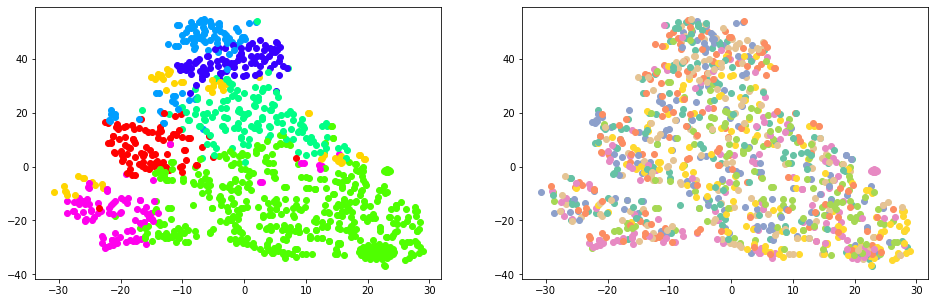

In [139]:
from sklearn.manifold import TSNE
#On regarde ce que ça donne avec 6 clusters:
#Avec un Standard Scaler
tsne=TSNE(n_components=2)
X_std=StandardScaler().fit_transform(X)
X_trans=tsne.fit_transform(X_std)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=7)
kmean.fit(X_std)
y=kmean.predict(X_std)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [140]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y,df['cluster'])

0.0194105476017991

In [141]:
#C'est moins bien...

In [142]:
from sklearn.decomposition import PCA,KernelPCA

In [144]:
pca=PCA(n_components=15)
pca.fit(X_std)


PCA(n_components=15)

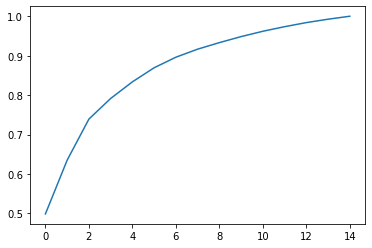

In [145]:
plt.plot(range(15),pca.explained_variance_ratio_.cumsum())
plt.show()

In [146]:
#On va tenter une réduction de dimension à 20 variables:
pca=PCA(n_components=2)

In [147]:
pca.fit(X_std)

PCA(n_components=2)

In [148]:
X_proj=pca.transform(X_std)

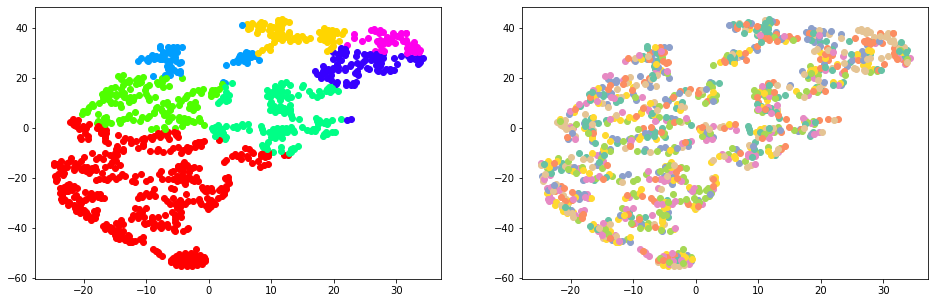

In [149]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_proj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=7)
kmean.fit(X_proj)
y=kmean.predict(X_proj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [150]:
adjusted_rand_score(y,df['cluster'])

0.017489798474947887

In [151]:
kpca=KernelPCA(kernel='rbf')
kpca.fit(X_std)


KernelPCA(kernel='rbf')

In [152]:
X_kproj=kpca.transform(X_std)

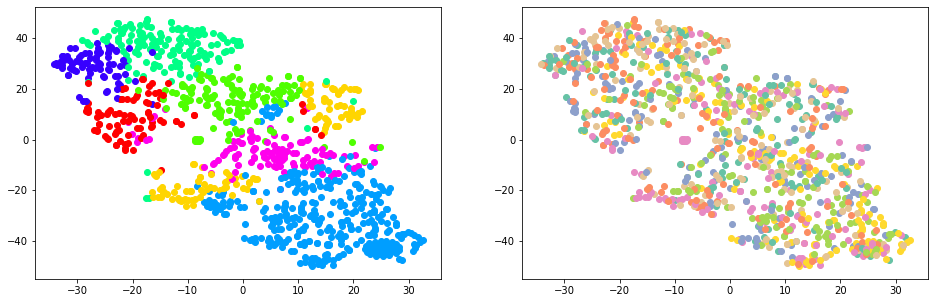

In [153]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_kproj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=7)
kmean.fit(X_kproj)
y=kmean.predict(X_kproj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [154]:
adjusted_rand_score(y,df['cluster'])

0.020375330050611148

In [155]:
#On a un peu amélioré

## regardons avec l'image VGG

In [156]:
data.head(1)

uniq_id                                 image  \
0  55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

         categorie                                         imagevgg16  \
0  Home Furnishing  [[[206, 204, 192], [205, 203, 191], [205, 202,...   

                                       image_origine  \
0  [[[192, 184, 173], [192, 184, 173], [193, 185,...   

                                          image_resh  \
0  [[[203, 198, 188], [203, 198, 188], [203, 197,...   

                                            image_nb  \
0  [[198, 198, 198, 198, 198, 200, 200, 199, 199,...   

                                        image_nbcont  \
0  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   

                                         image_vggnb  \
0  [[203, 202, 202, 203, 202, 203, 202, 204, 202,...   

                                            ORB_orig  \
0  [[246, 205, 237, 254, 252, 34, 94, 175, 19, 17...   

                                            ORB_cont  
0  [[20, 172, 132, 191, 189, 201, 78, 172, 159, 1...

In [157]:
sf =data.iloc[400]['image_vggnb']
img=data.iloc[400]['image_resh']

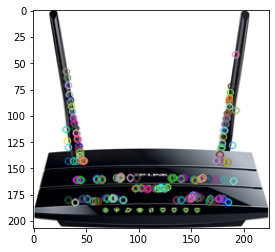

(<matplotlib.image.AxesImage at 0x7f06a2b51550>, None)

In [158]:
# Initiate STAR detector
orb = cv2.ORB_create()

# compute the descriptors with ORB
kp, des = orb.detectAndCompute(sf,None)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,kp,outImage=None)
plt.imshow(img2),plt.show()

In [160]:
#On va extraire les descripteurs des photos:
data['ORB_vgg']=data['image_vggnb'].apply(lambda x:orb.detectAndCompute(x,None)[1])

In [161]:
data['ORB_vgg'].apply(lambda x: size(x)).describe()

count     1050.000000
mean     11033.847619
std       3216.640803
min          1.000000
25%      10208.000000
50%      12160.000000
75%      13312.000000
max      14304.000000
Name: ORB_vgg, dtype: float64

In [173]:
#J'extrait tous mes descripteurs
descr=data.iloc[0]['ORB_vgg']
for i in range(1,1050):
    if size(data.iloc[i]['ORB_vgg'])>1:
        descr=np.vstack((descr,data.iloc[i]['ORB_vgg']))

In [175]:
size(descr)/32

362048.0

In [176]:
#On va faire un Kmean sur 10% de ces 350000 descripteurs:

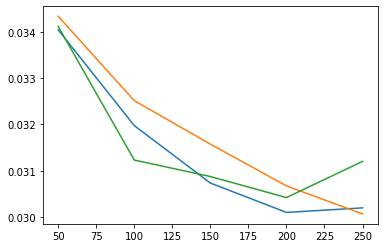

In [177]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#on va voir comment clusteriser ces descripteurs:
for i in range(3):
    #Je prends un échantillon d'environ 10% du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,35000)
    sil=[]
    for i in range(50,300,50):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,300,50),sil)
plt.show()  
    

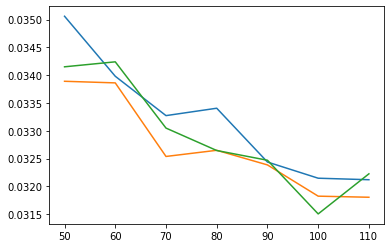

In [178]:
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,25000)
    sil=[]
    for i in range(50,120,10):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(50,120,10),sil)
plt.show()  

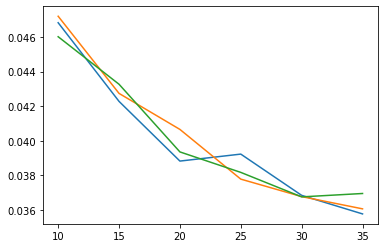

In [179]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,25000)
    sil=[]
    for i in range(10,40,5):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(10,40,5),sil)
plt.show()  

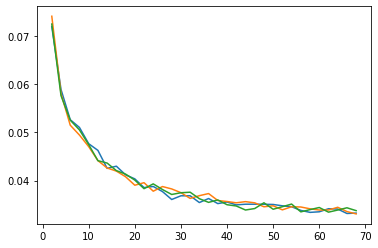

In [180]:
#On essai entre 50 et 100
for i in range(3):
    #Je prends un échantillon du groupe:
    rng = np.random.default_rng()
    sampl=rng.choice(descr,25000)
    sil=[]
    for i in range(2,70,2):
        km=KMeans(n_clusters=i)
        km.fit(sampl)
        y=km.predict(sampl)
        sil.append(silhouette_score(sampl,y))

    plt.plot(range(2,70,2),sil)
plt.show() 

In [181]:
#On va partir sur 64 clusters
#regardons ce que ça donne:
km=KMeans(n_clusters=64)
km.fit(descr)
y=km.predict(descr)
print(silhouette_score(descr,y))

0.03160156202814909


In [182]:
#On a donc notre cluster
#on va construire un df avec 64 features et pour chaque image on indiquera combien de descripteurs de chaque
#cluster elle contient:

df=data[['categorie',"ORB_vgg"]].copy()
df.head()


categorie                                            ORB_vgg
0  Home Furnishing  [[125, 150, 230, 117, 155, 95, 118, 250, 119, ...
1        Baby Care  [[139, 148, 15, 255, 241, 212, 189, 119, 29, 7...
2        Baby Care  [[100, 72, 213, 244, 108, 8, 236, 128, 249, 13...
3  Home Furnishing  [[43, 191, 192, 13, 233, 21, 174, 127, 58, 98,...
4  Home Furnishing  [[183, 61, 222, 146, 156, 115, 182, 65, 204, 2...

In [183]:
for i in range(64):
    df[i]=np.zeros(df.shape[0])

 

In [185]:
km.predict(df.iloc[0]['ORB_vgg'])

array([28, 21, 58,  5, 18,  1, 33, 37,  6, 33, 56, 56, 63, 28, 55, 58, 28,
        3, 14, 14, 58, 28, 33,  1, 45, 14, 55, 45, 33, 14, 33,  4,  5,  5,
       14, 45, 45, 45, 33,  1, 26,  4, 18, 17, 12,  8,  7, 46, 23, 63, 23,
       35, 14,  7, 45, 61, 38, 35, 33, 21,  5, 35, 33, 14,  7, 41,  9,  5,
       45, 45, 40, 33,  5, 14,  9,  5, 33, 33,  1,  5,  5,  1, 14, 33, 59,
       20, 41, 45,  4,  1,  4,  5, 32, 28, 33,  5, 13, 37, 43,  1, 14, 32,
       56, 18, 40,  0, 27,  5,  1, 45, 14, 32, 33, 28, 14,  5, 45, 59,  2,
       14, 46, 14, 32, 45,  7, 58, 14, 14, 45, 28,  4, 14, 28, 40, 55,  9,
        1, 33, 53, 35,  5, 58, 53, 40, 58, 28, 21, 11,  5, 33,  5, 35,  5,
       28,  5,  9,  5, 26, 28,  5, 41, 33,  7, 58, 55,  4, 37, 40, 33, 14,
        2, 40, 32, 26, 33, 55,  2, 26, 14, 41,  2, 45, 56, 28,  1, 32, 56,
       28, 26,  7, 11, 32, 26,  2,  9,  9, 58,  2, 45, 18, 14, 33, 23,  2,
       18, 28, 32,  5, 33,  5, 33, 53, 11, 14, 53, 23, 47,  9, 28, 55, 32,
        5, 23,  2,  5, 32

In [186]:
def features(row,k):
    n=0
    if size(row['ORB_vgg'])==1:
        return 0
    for i in km.predict(row['ORB_vgg']):
        if i==k:
            n+=1
    return n

In [187]:
for i in range(64):
    df[i]=df.apply(lambda x: features(x,i),axis=1)

In [188]:
df

categorie                                            ORB_vgg   0  \
0     Home Furnishing  [[125, 150, 230, 117, 155, 95, 118, 250, 119, ...   1   
1           Baby Care  [[139, 148, 15, 255, 241, 212, 189, 119, 29, 7...   7   
2           Baby Care  [[100, 72, 213, 244, 108, 8, 236, 128, 249, 13...   9   
3     Home Furnishing  [[43, 191, 192, 13, 233, 21, 174, 127, 58, 98,...  18   
4     Home Furnishing  [[183, 61, 222, 146, 156, 115, 182, 65, 204, 2...   7   
...               ...                                                ...  ..   
1045        Baby Care  [[61, 31, 66, 129, 246, 19, 235, 240, 61, 100,...   9   
1046        Baby Care  [[10, 145, 50, 220, 83, 212, 184, 101, 173, 65...   3   
1047        Baby Care  [[180, 250, 122, 224, 102, 203, 83, 252, 191, ...   9   
1048        Baby Care  [[139, 157, 39, 159, 253, 135, 239, 244, 159, ...   6   
1049        Baby Care  [[27, 90, 74, 172, 26, 2, 78, 244, 37, 66, 220...   7   

       1   2   3   4   5   6   7  ...  54  55  56  57  58  59  60  61  62  63  
0     25   8   1   7  55   1  13  ...   2   7   6   2  18   3   0   2   0   3  
1      2   4   4   1   3   3   2  ...   3   2   2   2  15   5   3   1   5   4  
2     10   1  11  12   2   6  14  ...   3   3   2   5   3   7   4  13   6   4  
3      3   6   4   5   5   4   8  ...   4  18  10   6   8   5   7   8   4   5  
4      3  12   3   2  10  14  11  ...   5   3   5   1   6   7  16   5   9   7  
...   ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
1045   5   7   5   0   4   8   5  ...   2   2   1   2   6   3   7   1   7   9  
1046   0   9   7   2   4   6   6  ...   1   2   4   6   6   4   2   2   3  10  
1047   5   5  16   5   2   9   7  ...   5   2   4   2   3   4  14   7  11   9  
1048   8  11   3   6  15   1   9  ...   5   1   5   2  14   6   6   4   7  11  
1049   5   9   7   5   3  19   6  ...   9   5   2  10   0  19   7   1   2  13  

[1050 rows x 66 columns]

In [189]:
X=df.drop(['categorie','ORB_vgg'],axis=1).values

<ipython-input-190-04f1b3d29dca>:21: UserWarning: Legend does not support 0.08418238524725263 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-190-04f1b3d29dca>:24: UserWarning: Legend does not support 0.08418238524725263 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-input-190-04f1b3d29dca>:21: UserWarning: Legend does not support 0.10772405756308591 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
<ipython-i

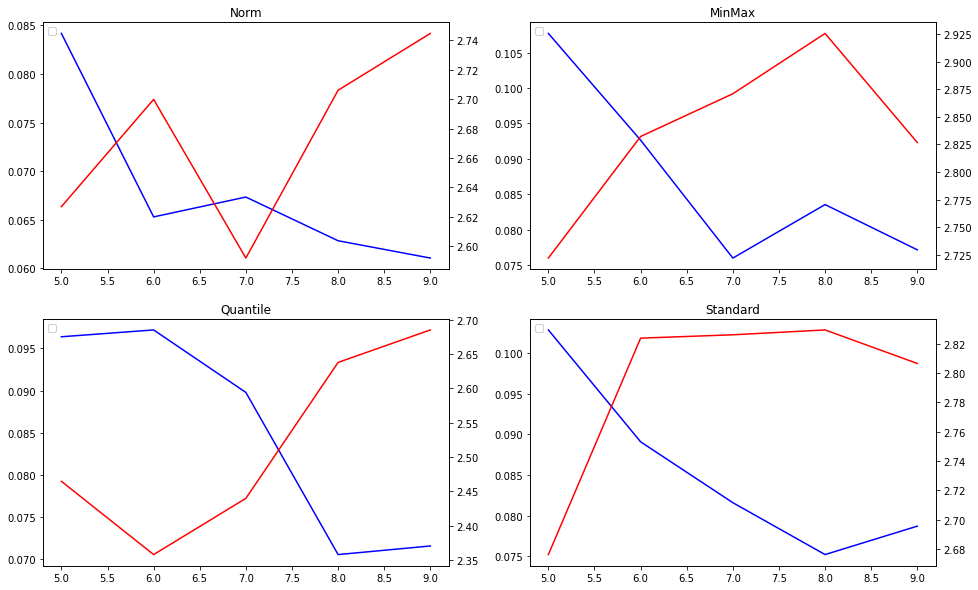

In [190]:
#On standardise et on regarde ce que ça donne:

from sklearn.preprocessing import Normalizer,MinMaxScaler,QuantileTransformer,StandardScaler
from sklearn.metrics import davies_bouldin_score

Trans=[Normalizer(),MinMaxScaler(),QuantileTransformer(),StandardScaler()]
Name=['Norm','MinMax','Quantile','Standard']
fig=figure(figsize=(16,10))
for i in range (4):
    sil=[]
    DB=[]
    X_trans=Trans[i].fit_transform(X)
    for n in range (5,10):
        kmean=KMeans(n_clusters=n)
        kmean.fit(X_trans)
        y=kmean.predict(X_trans)
        sil.append(silhouette_score(X_trans,y))
        DB.append(davies_bouldin_score(X_trans,y))
    plt.subplot(2,2,i+1)
    plt.plot(range(5,10),sil,c='b')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    ax2 = pyplot.gca().twinx()
    plt.plot(range(5,10),DB,c='r')
    plt.legend(sil,['Coefficient de Silhouette'],loc='upper left')
    plt.title(Name[i])
plt.show()

In [192]:
def cat(x):
    if x=='Home Furnishing':
        return 1
    if x=='Kitchen & Dining':
        return 2
    if x=='Computers':
        return 3
    if x=='Beauty and Personal Care':
        return 4
    if x=='Watches':
        return 5
    if x=='Baby Care':
        return 6
    else:
        return 0

In [193]:
df['cluster']=df['categorie'].apply(lambda x : cat(x))

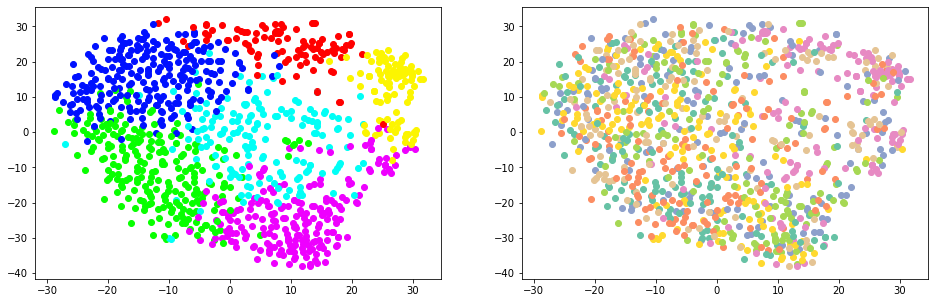

In [194]:
from sklearn.manifold import TSNE
#On regarde ce que ça donne avec 6 clusters:
#Avec un Standard Scaler
tsne=TSNE(n_components=2)
X_std=QuantileTransformer().fit_transform(X)
X_trans=tsne.fit_transform(X_std)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=6)
kmean.fit(X_std)
y=kmean.predict(X_std)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/6))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [195]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y,df['cluster'])

0.03761753011905795

In [ ]:
#C'est un peu mieux mais c'est pas famuex...

In [196]:
from sklearn.decomposition import PCA,KernelPCA

In [197]:
pca=PCA(n_components=64)
pca.fit(X_std)


PCA(n_components=64)

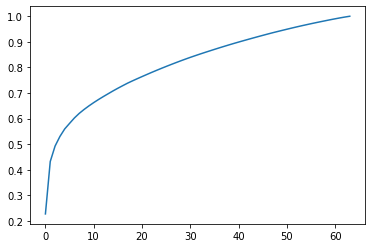

In [198]:
plt.plot(range(64),pca.explained_variance_ratio_.cumsum())
plt.show()

In [207]:
#On va tenter une réduction de dimension à 20 variables:
pca=PCA(n_components=4)

In [208]:
pca.fit(X_std)

PCA(n_components=4)

In [209]:
X_proj=pca.transform(X_std)

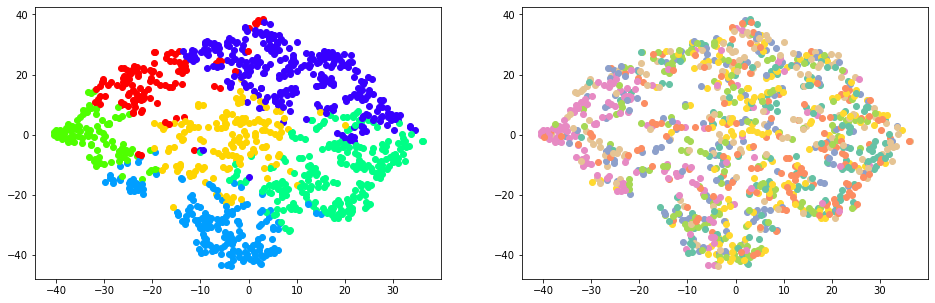

In [210]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_proj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=6)
kmean.fit(X_proj)
y=kmean.predict(X_proj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [211]:
adjusted_rand_score(y,df['cluster'])

0.03931431577096644

In [217]:
kpca=KernelPCA(kernel='rbf')
kpca.fit(X_std)


KernelPCA(kernel='rbf')

In [218]:
X_kproj=kpca.transform(X_std)

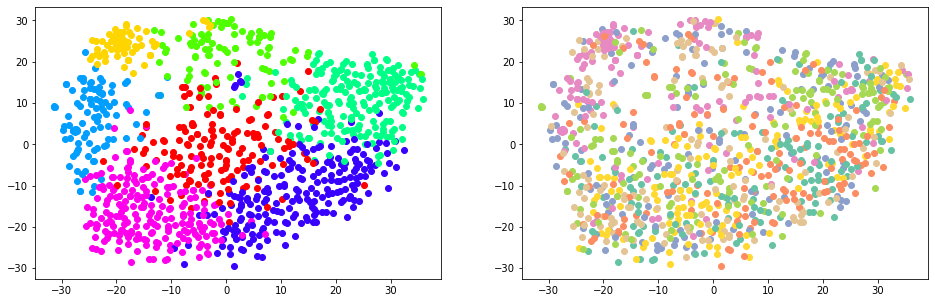

In [220]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X_kproj)


plt.figure(figsize=(16,5))

kmean=KMeans(n_clusters=7)
kmean.fit(X_kproj)
y=kmean.predict(X_kproj)

plt.subplot(121)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=y[i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.hsv(cat/7))
    
plt.subplot(122)
for i in range(text_data.shape[0]):
    for j in range(7):
        cat=df['cluster'][i]
        if cat==j:
            hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat/7))
    
plt.show()

In [221]:
adjusted_rand_score(y,df['cluster'])

0.039499805889143154

In [ ]:
#On a encore un peu amélioré

# On va essayer le transfer Learning